In [19]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [20]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json

#Import all the necessary CLAW libraries
import create_directory
import CLAW

import warnings

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [21]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [22]:
name_of_project = 'FaceFats'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

One or both of the destination directories 'Projects/FaceFats/o3on' and 'Projects/FaceFats/o2only' do not exist.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [23]:
# Set default values
data_base_name_location = 'lipid_database/Lipid_Database.xlsx'
Project = './Projects/'
Project_Name = 'FaceFats'
Project_Folder_data = Project + Project_Name + '/mzml_oz/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'FaceFats'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/Lipid_Database.xlsx
Project: ./Projects/
Project_Name: FaceFats
Project_Folder_data: ./Projects/FaceFats/mzml_oz/
Project_results: ./Projects/FaceFats/results/
file_name_to_save: FaceFats
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [24]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [25]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_DOD94_F3_WT_cereb_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_DOD94_F3_WT_cortex_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_DOD94_F3_WT_dienc_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_DOD94_F3_WT_hippo_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_FAD184_F3_WT_cereb_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_FAD184_F3_WT_cortex_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_FAD184_F3_WT_dienc_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_FAD184_F3_WT_hippo_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_FAD184_F4_WT_cereb_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_FAD184_F4_WT_cortex_O3off_01.mzML

Finished pa

In [26]:
df_MRM.head(None)

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition
0,NaN,23881.841637,NaN,584.4,437.3,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
1,NaN,23570.421612,NaN,612.4,437.3,11282023_DOD94_F3_WT_cereb_O3off_01,612.4 -> 437.3
2,NaN,24330.961636,NaN,622.5,503.4,11282023_DOD94_F3_WT_cereb_O3off_01,622.5 -> 503.4
3,NaN,24203.941673,NaN,624.5,505.4,11282023_DOD94_F3_WT_cereb_O3off_01,624.5 -> 505.4
4,NaN,23612.401615,NaN,626.5,437.3,11282023_DOD94_F3_WT_cereb_O3off_01,626.5 -> 437.3
...,...,...,...,...,...,...,...
14695,TAG,328699.824772,"[TG(57:9),TG(56:2)]_FA18:1",932.9,633.6,12012023_FAD173_M1_5xFAD_liver_O3off_01,932.9 -> 633.6
14696,TAG,134490.908905,"[TG(58:7),TG(57:0)]_FA18:1",950.9,651.6,12012023_FAD173_M1_5xFAD_liver_O3off_01,950.9 -> 651.6
14697,TAG,60898.083759,"[TG(59:13),TG(58:6)]_FA18:1",952.8,653.5,12012023_FAD173_M1_5xFAD_liver_O3off_01,952.8 -> 653.5
14698,TAG,59683.304180,"[TG(59:12),TG(58:5)]_FA18:1",954.8,655.5,12012023_FAD173_M1_5xFAD_liver_O3off_01,954.8 -> 655.5


In [27]:
df_OzESI.head(None)
# df_OzESI.to_csv('FF_OzOFF_full.csv')
# df_OzESI.to_excel('FaceFatsOzdf.xlsx')

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,584.4,437.3,0.044183,41.860004,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
1,NaN,584.4,437.3,0.088567,41.740002,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
2,NaN,584.4,437.3,0.132967,42.000004,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
3,NaN,584.4,437.3,0.177367,41.800003,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
4,NaN,584.4,437.3,0.221783,41.760002,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
...,...,...,...,...,...,...,...
8276007,NaN,956.9,657.6,24.779117,41.700005,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
8276008,NaN,956.9,657.6,24.823517,41.940002,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
8276009,NaN,956.9,657.6,24.867933,41.900002,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
8276010,NaN,956.9,657.6,24.912333,41.960003,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6


The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [28]:
d1 = df_OzESI.iloc[:,1:9]

d1

import pandas as pd

# Assuming d1 is your DataFrame

# Define the retention time range as a tuple (lower_bound, upper_bound)
retention_time_range = (10, 25)  # Replace with your specific range values

# Filter the DataFrame to keep only rows where Retention_Time is within the specified range
filtered_d1 = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range

filtered_d1

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
225,584.4,437.3,10.035700,41.820004,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
226,584.4,437.3,10.080100,41.960003,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
227,584.4,437.3,10.124517,42.000004,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
228,584.4,437.3,10.168917,41.920002,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
229,584.4,437.3,10.213317,42.020004,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
...,...,...,...,...,...,...
8276007,956.9,657.6,24.779117,41.700005,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
8276008,956.9,657.6,24.823517,41.940002,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
8276009,956.9,657.6,24.867933,41.900002,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
8276010,956.9,657.6,24.912333,41.960003,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6


DBSCAN
CLUSTER DATA

ALL SAMPLES CLustering

In [3]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Assuming filtered_d1 is your DataFrame
clustered_data = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# Iterate over each group of Parent_Ion and Product_Ion
for (parent_ion, product_ion), group in filtered_d1.groupby(['Parent_Ion', 'Product_Ion']):
    # Calculate 1% below the maximum 'OzESI_Intensity'
    max_intensity = group['OzESI_Intensity'].max()
    cutoff_intensity = max_intensity * 0.01

    # Apply the filters
    filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 2000)]

    # Check if the filtered group is empty, skip to the next iteration if so
    if filtered_group.empty:
        continue

    # Reshape the 'Retention_Time' data for DBSCAN
    retention_times = filtered_group[['Retention_Time']].values

    # Apply DBSCAN clustering to this specific ion pair group
    dbscan = DBSCAN(eps=0.09, min_samples=5).fit(retention_times)

    # Get the cluster labels
    labels = dbscan.labels_

    # Add the cluster labels to the filtered group
    filtered_group['Cluster_Label'] = labels

    # Append the clustered group to the results DataFrame
    clustered_data = pd.concat([clustered_data, filtered_group])

# The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
clustered_data


NameError: name 'filtered_d1' is not defined

Group data by transition

In [2]:
#group cluster data by sample ID Parent and Product Ion
grouped_cluster_data = clustered_data.groupby(['Parent_Ion', 'Product_Ion'])
#add group number to each to a new column called Group
clustered_data['Group'] = grouped_cluster_data.ngroup()
clustered_data

KeyError: 'Parent_Ion'

Plot clustered data if need to validate

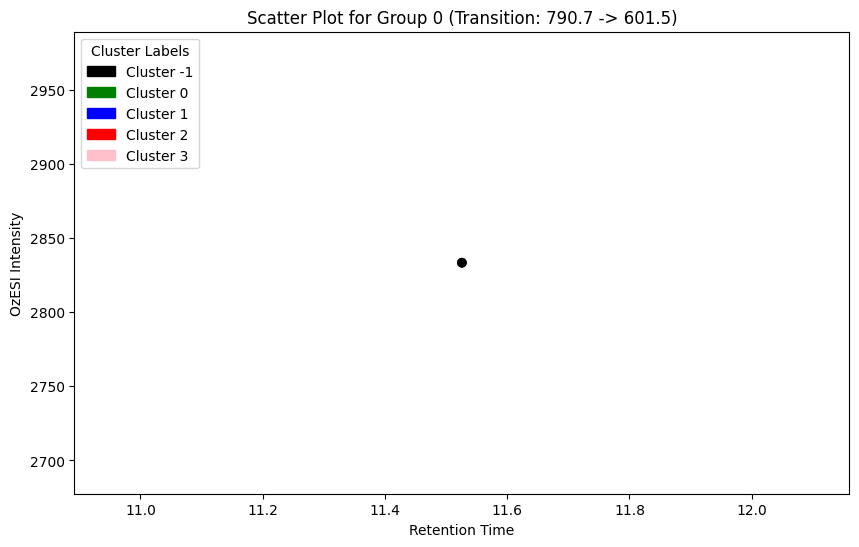

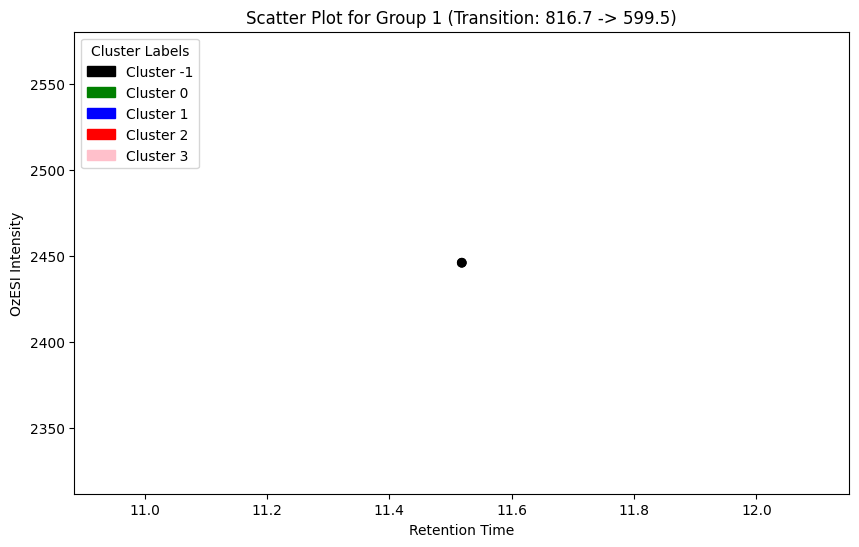

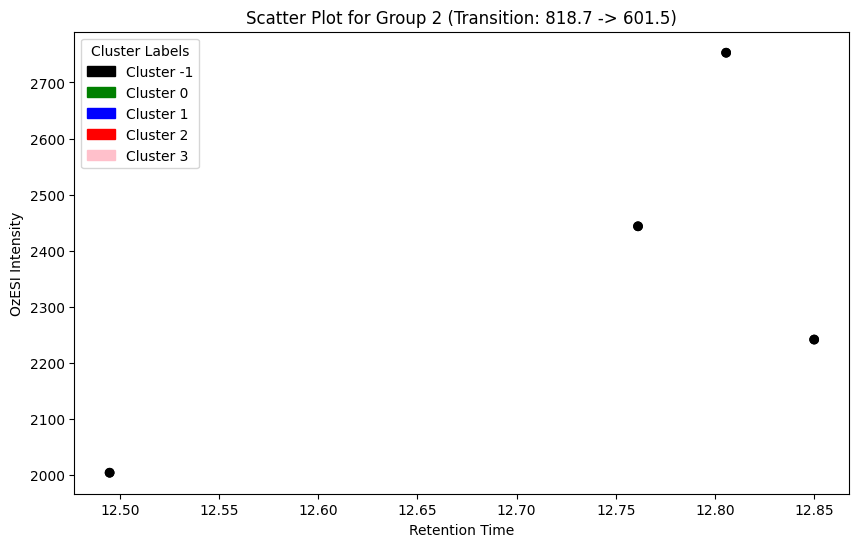

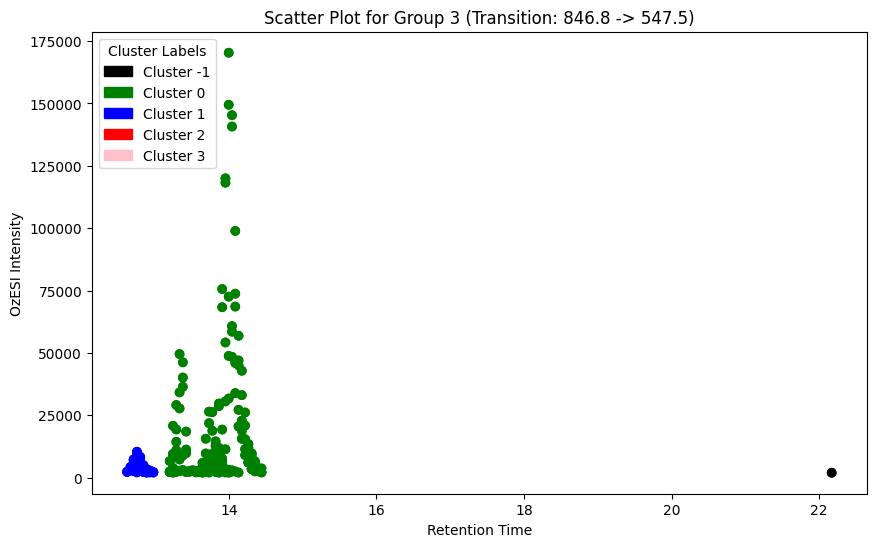

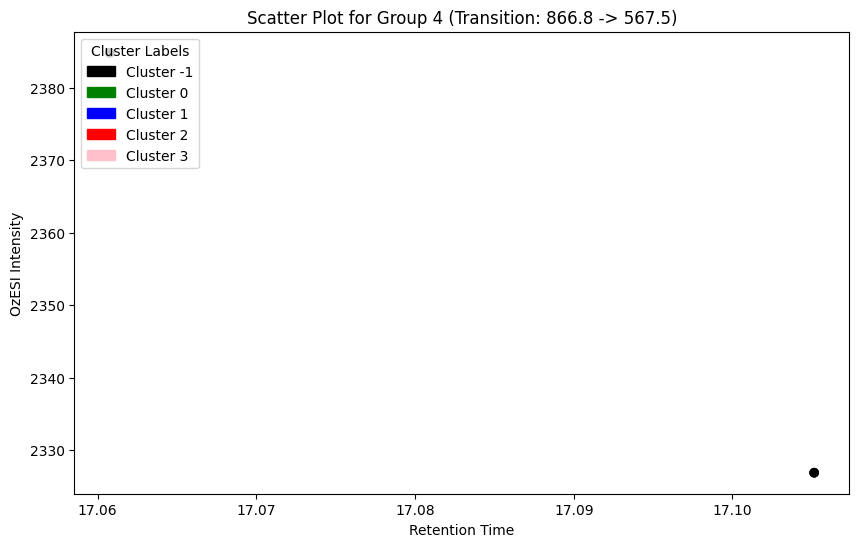

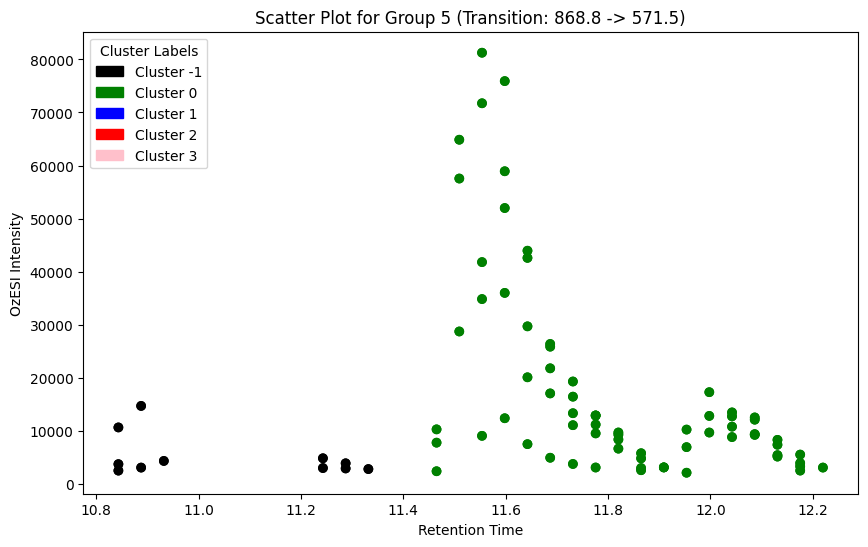

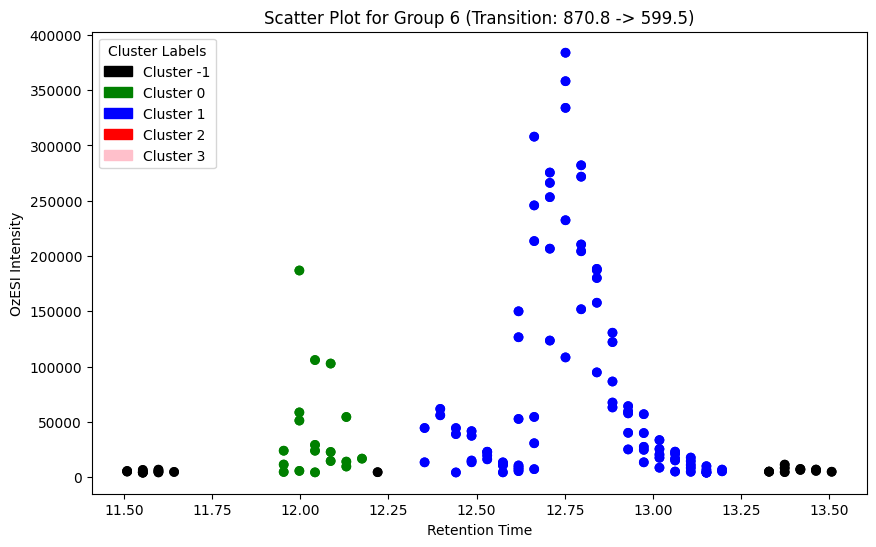

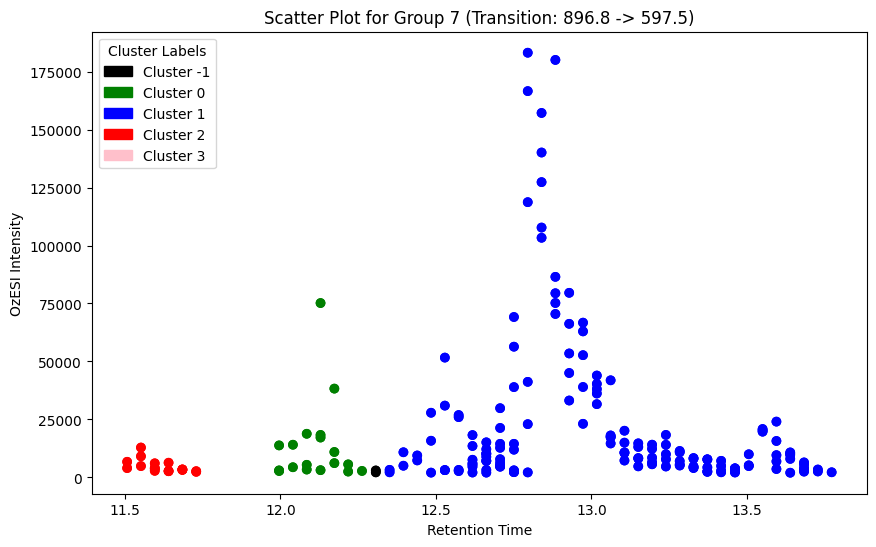

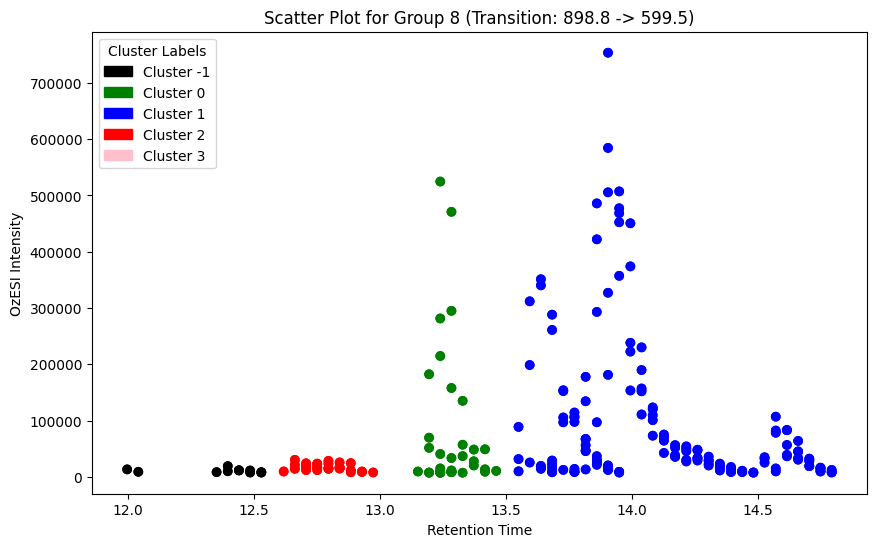

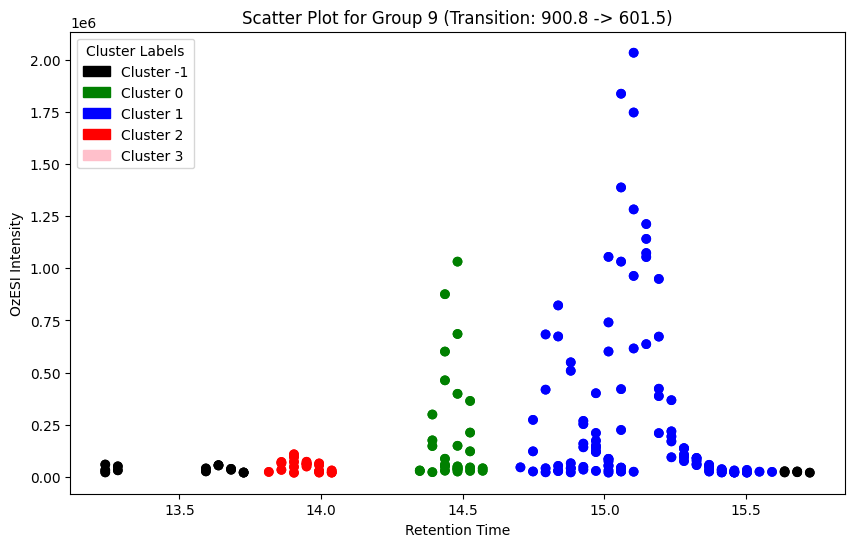

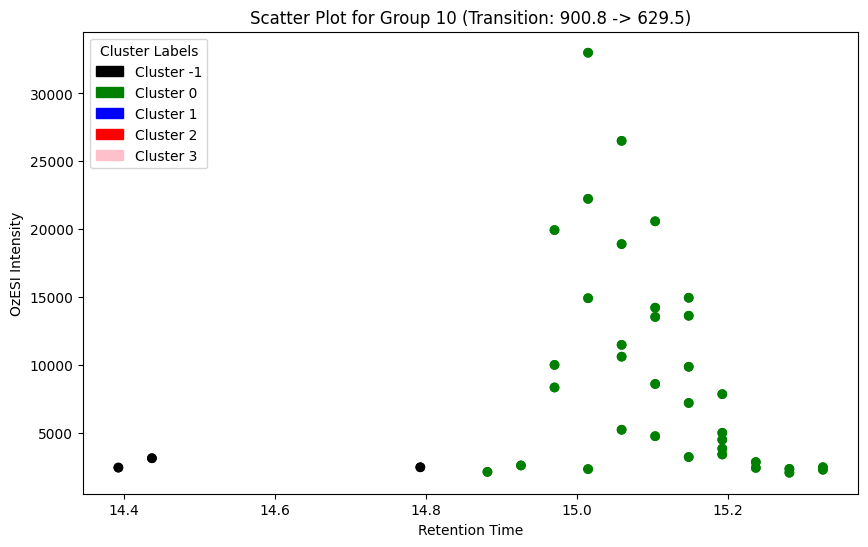

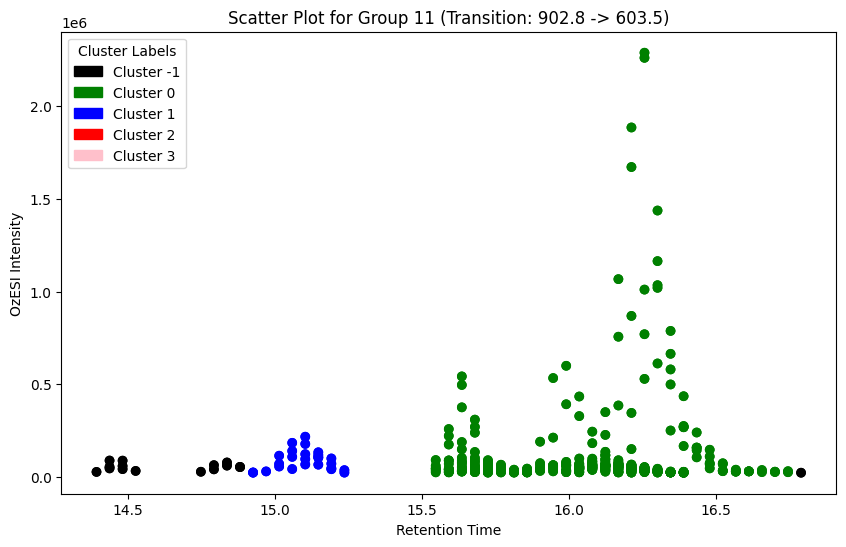

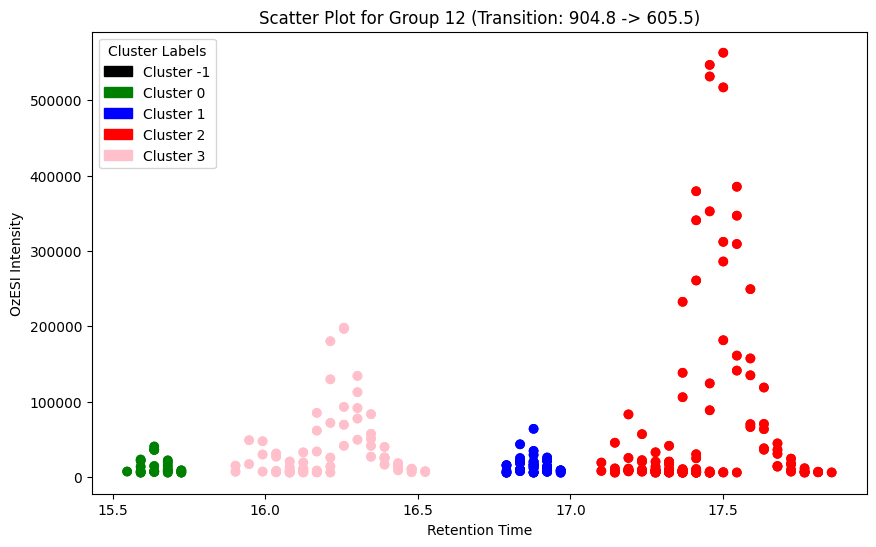

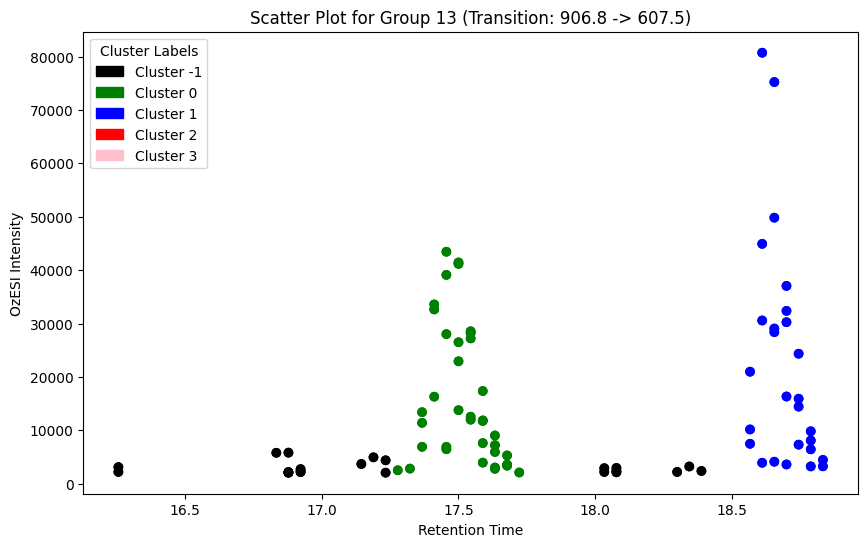

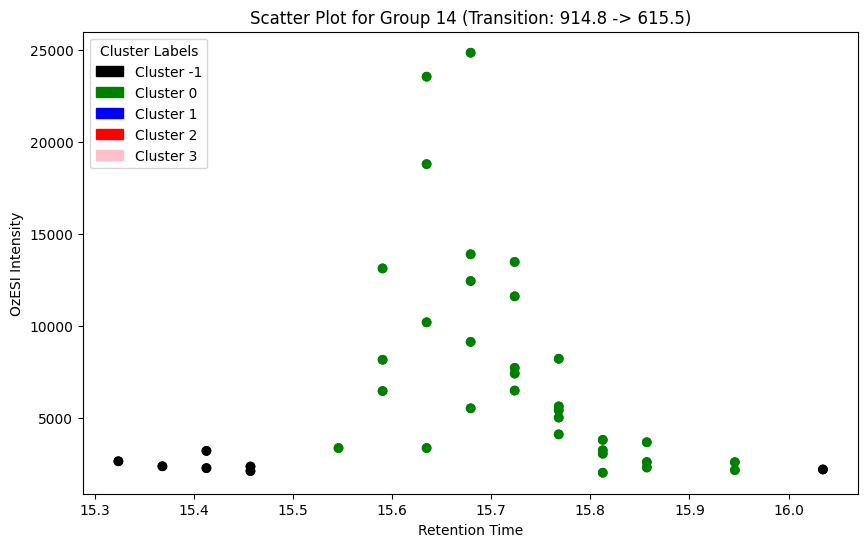

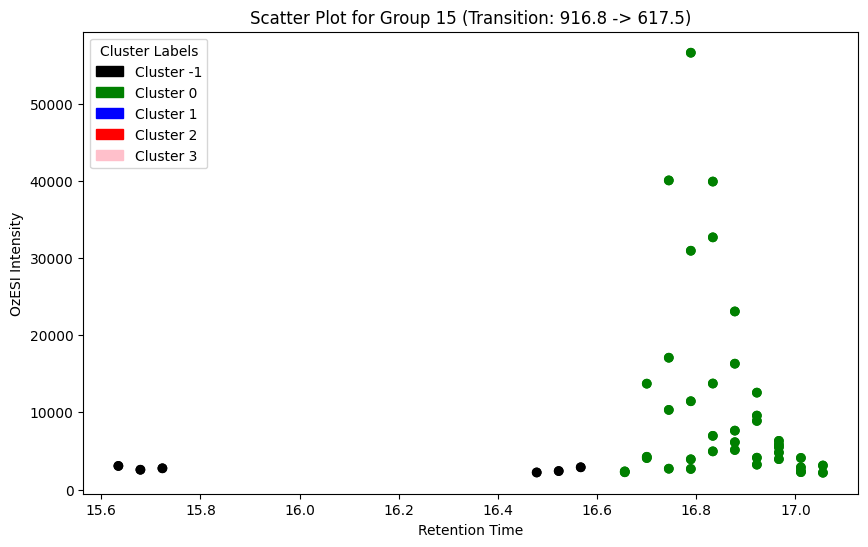

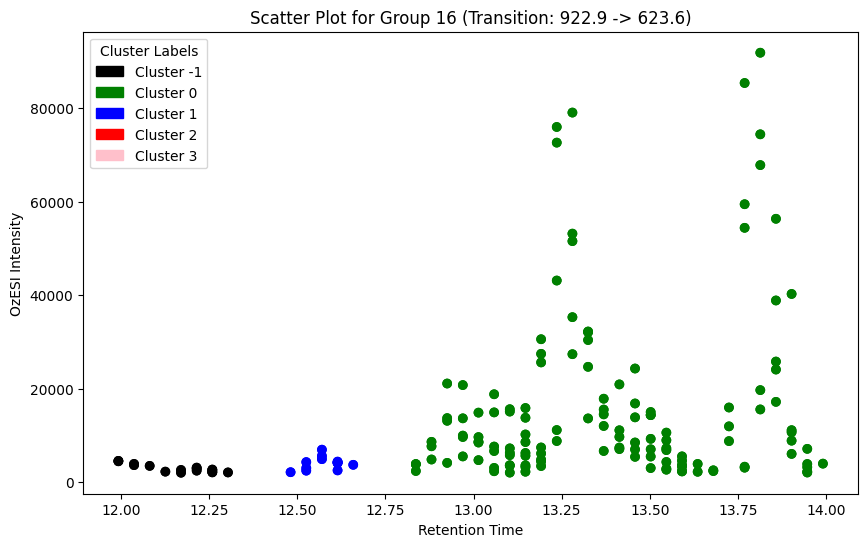

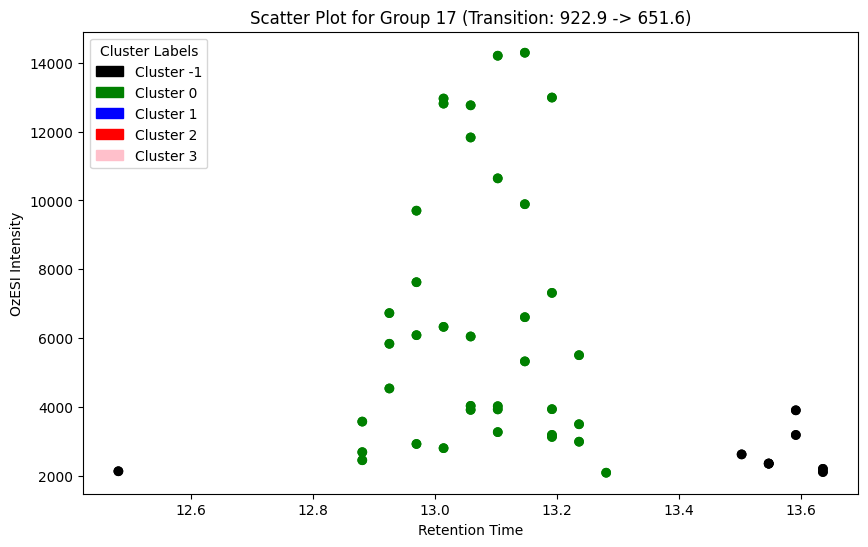

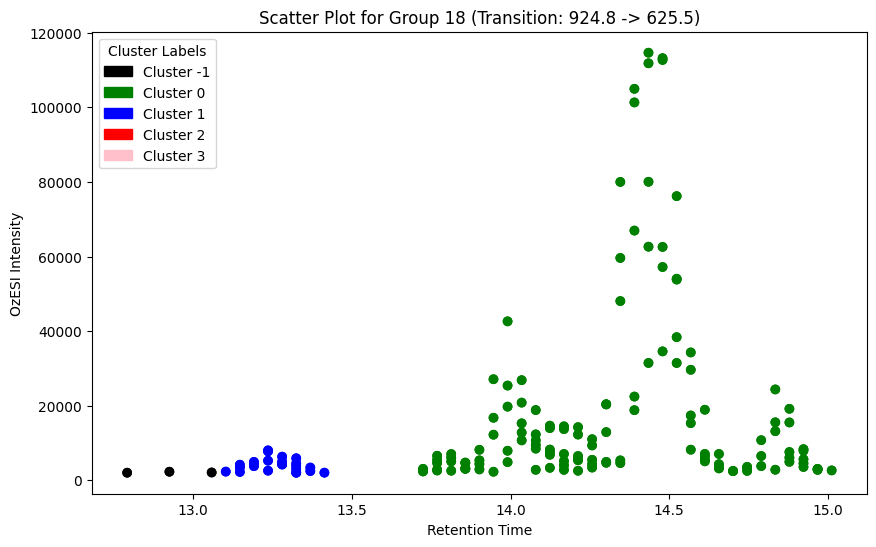

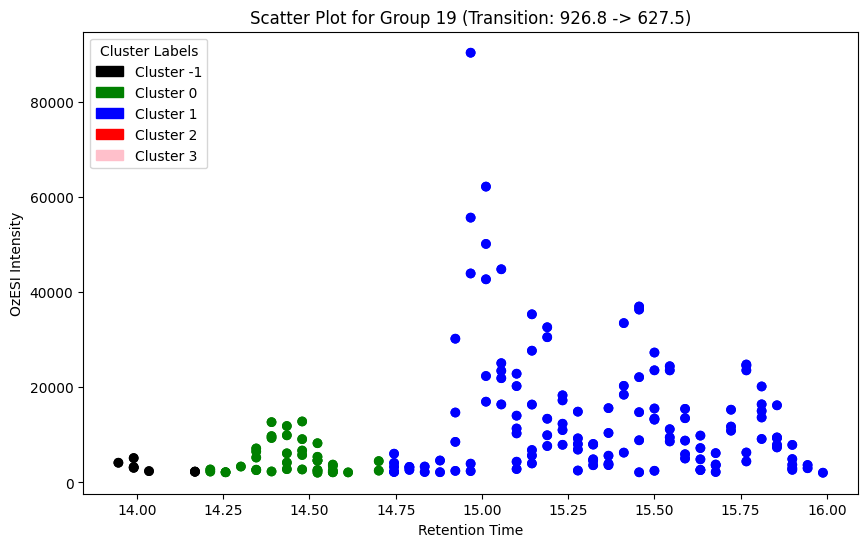

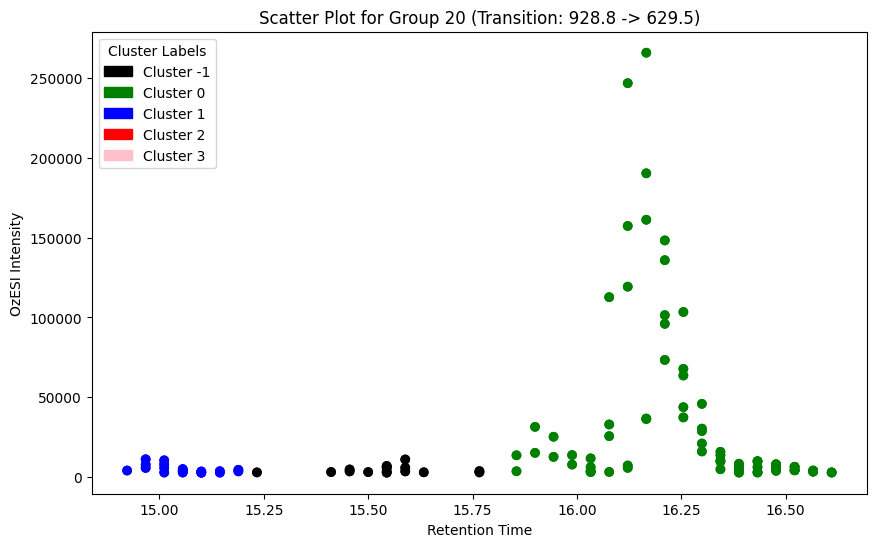

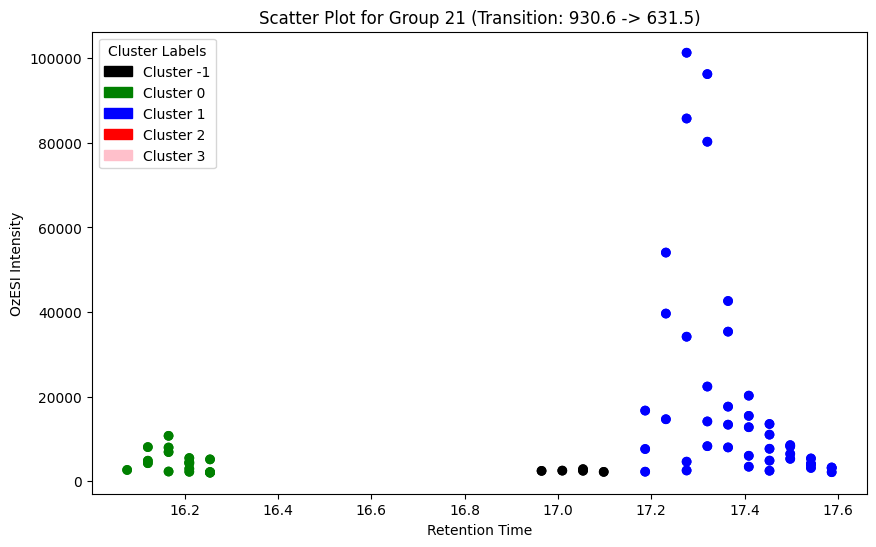

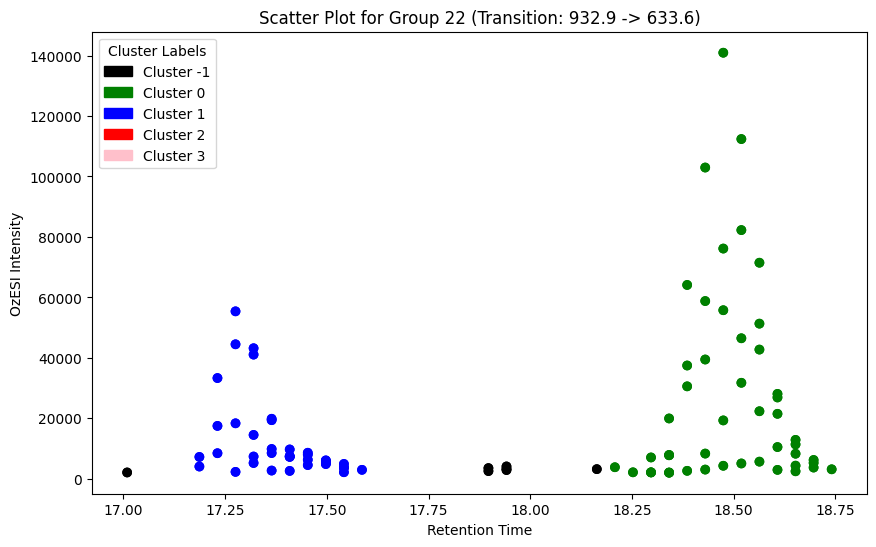

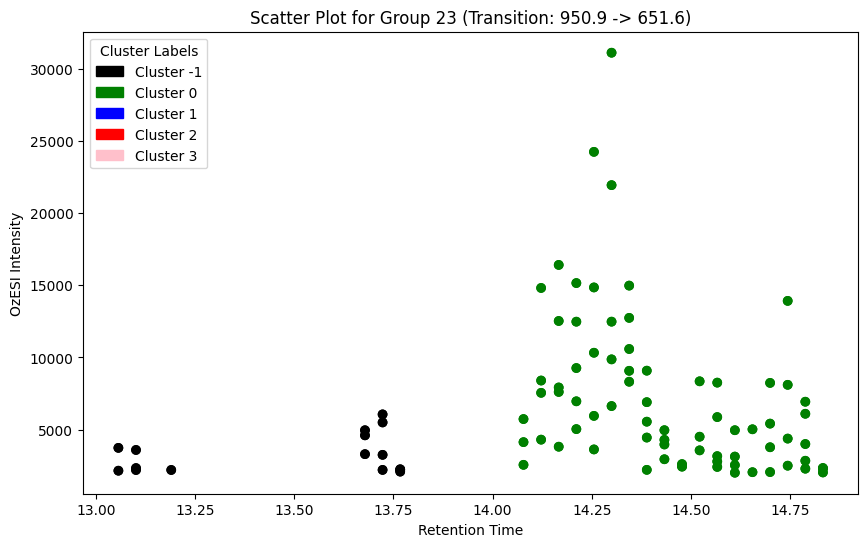

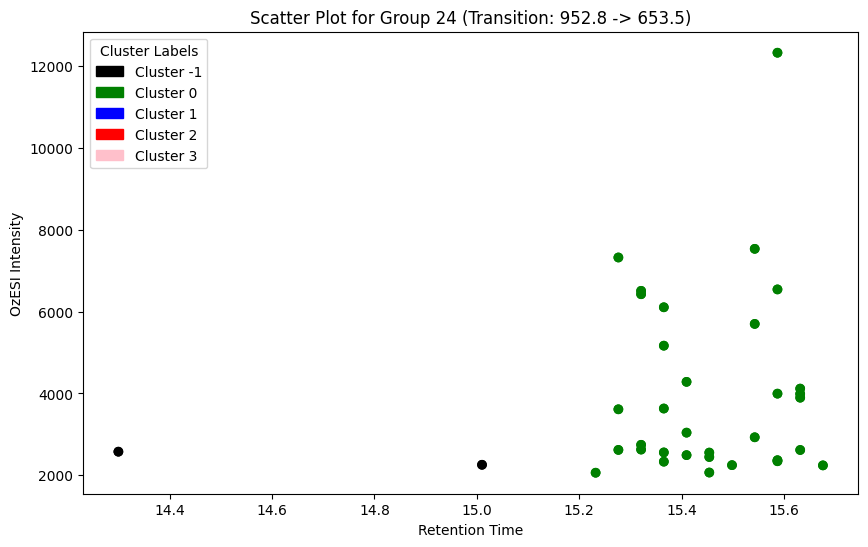

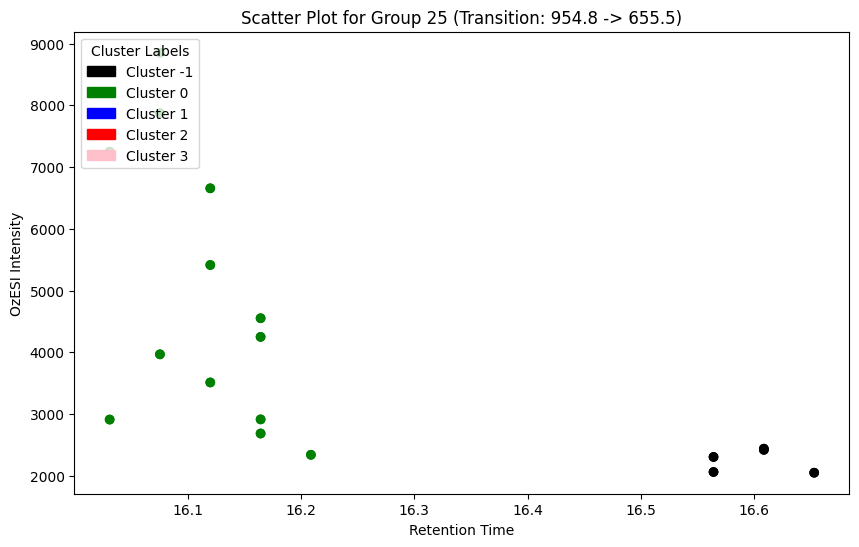

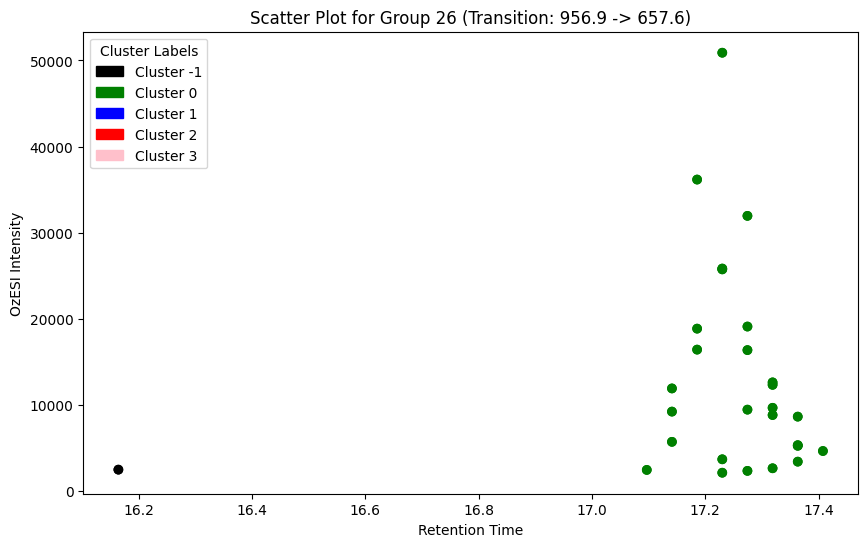

In [85]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

save_dir = 'Projects/FaceFats/plots/validation/'
# Assuming clustered_data is your DataFrame with the necessary columns

# Define custom colors for the clusters
color_map = {-1: 'black', 0: 'green', 1: 'blue', 2: 'red', 3: 'pink'}

# Get unique Group values
unique_groups = clustered_data['Group'].unique()

# Iterate through each unique group
for group in unique_groups:
    # Filter the data for each Group
    group_filtered_data = clustered_data[clustered_data['Group'] == group]
    colors = group_filtered_data['Cluster_Label'].map(color_map)

    # Extract the corresponding Transition value for the group
    # Assuming that all rows in a group have the same Transition value
    transition_value = group_filtered_data['Transition'].iloc[0]

    # Set up the plot for each group
    plt.figure(figsize=(10, 6))
    plt.scatter(group_filtered_data['Retention_Time'], group_filtered_data['OzESI_Intensity'], color=colors)

    # Add labels and title
    plt.xlabel('Retention Time')
    plt.ylabel('OzESI Intensity')
    plt.title(f'Scatter Plot for Group {group} (Transition: {transition_value})')

    # Create a legend for the plot
    patch_list = [mpatches.Patch(color=color, label=f'Cluster {label}') for label, color in color_map.items()]
    plt.legend(handles=patch_list, loc='upper left', title='Cluster Labels')
    
    # Save the plot as a PNG file in the specified directory
    filename = f'Group_{group}_Transition_{transition_value}.png'
    plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')


    # Show the plot
    plt.show()



Max intesnity mean RT

In [109]:
import pandas as pd

# Assuming clustered_data is your original DataFrame

# Calculate the max OzESI_Intensity for each Group and Cluster_Label
# directly within the DataFrame
clustered_data['Max_OzESI_Intensity'] = clustered_data.groupby(['Group', 'Cluster_Label'])['OzESI_Intensity'].transform('max')

# Step 2: Identify the cluster with the highest Max_OzESI_Intensity for each Group
group_max_cluster = clustered_data.groupby('Group')['Max_OzESI_Intensity'].idxmax()

# Step 3: Create a DataFrame with only those rows that belong to the identified clusters
filtered_data = clustered_data.loc[group_max_cluster]

#change this code below

# Calculate the average Retention_Time for each Parent_Ion and Product_Ion
# directly within the DataFrame
filtered_data['Average_Retention_Time'] = filtered_data.groupby(['Parent_Ion', 'Product_Ion'])['Retention_Time'].transform('mean')

# Filtering out rows where 'Cluster_Label' is -1
filtered_df = clustered_data[clustered_data['Cluster_Label'] != -1]

filtered_df


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group,Max_OzESI_Intensity,Average_Retention_Time
65605,846.8,547.5,13.242950,2048.980225,11282023_DOD94_F3_WT_cereb_O3off_01,846.8 -> 547.5,0,3,170334.546875,13.84204
150053,846.8,547.5,13.198567,2312.840088,11282023_DOD94_F3_WT_cortex_O3off_01,846.8 -> 547.5,0,3,170334.546875,13.84204
150054,846.8,547.5,13.242967,7951.380371,11282023_DOD94_F3_WT_cortex_O3off_01,846.8 -> 547.5,0,3,170334.546875,13.84204
150055,846.8,547.5,13.287383,11012.541016,11282023_DOD94_F3_WT_cortex_O3off_01,846.8 -> 547.5,0,3,170334.546875,13.84204
150056,846.8,547.5,13.331783,7293.760742,11282023_DOD94_F3_WT_cortex_O3off_01,846.8 -> 547.5,0,3,170334.546875,13.84204
...,...,...,...,...,...,...,...,...,...,...
8275836,956.9,657.6,17.185533,18843.082031,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6,0,26,50893.445312,17.26118
8275837,956.9,657.6,17.229933,25820.281250,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6,0,26,50893.445312,17.26118
8275838,956.9,657.6,17.274350,19086.800781,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6,0,26,50893.445312,17.26118
8275839,956.9,657.6,17.318750,8809.420898,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6,0,26,50893.445312,17.26118


Choose Cluster with correct RT

In [103]:
# # Assuming filtered_df is your DataFrame

# # Step 1: Identify the combination with the highest Max_OzESI_Intensity for each Group
# group_max_intensity_combination = filtered_df.groupby('Group').apply(lambda x: x.loc[x['Max_OzESI_Intensity'].idxmax()])
# print('group max:', group_max_intensity_combination)
# # Identify which Cluster_Label this belongs to
# group_to_cluster = group_max_intensity_combination.set_index('Group')['Cluster_Label'].to_dict()
# print('group to cluseter:',group_to_cluster)

# # Step 2: Drop other Cluster_Labels from the df for that specific group
# filtered_df = filtered_df[filtered_df.apply(lambda x: x['Cluster_Label'] == group_to_cluster[x['Group']], axis=1)]

# filtered_df

Filter max intesnity for Sample_ID group

In [110]:
import pandas as pd

# Assuming your DataFrame is named df

# Group by 'Sample_ID' and 'Group', and find the row with the highest 'OzESI_Intensity' for each group
filtered_df2= filtered_df.groupby(['Sample_ID', 'Group']).apply(lambda x: x.loc[x['OzESI_Intensity'].idxmax()]).reset_index(drop=True)

filtered_df2


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group,Max_OzESI_Intensity,Average_Retention_Time
0,846.8,547.5,13.242950,2048.980225,11282023_DOD94_F3_WT_cereb_O3off_01,846.8 -> 547.5,0,3,1.703345e+05,13.842040
1,898.8,599.5,13.283433,9741.100586,11282023_DOD94_F3_WT_cereb_O3off_01,898.8 -> 599.5,0,8,5.246770e+05,13.284694
2,900.8,601.5,14.481833,39644.941406,11282023_DOD94_F3_WT_cereb_O3off_01,900.8 -> 601.5,0,9,1.031644e+06,14.464093
3,902.8,603.5,15.636117,78698.203125,11282023_DOD94_F3_WT_cereb_O3off_01,902.8 -> 603.5,0,11,2.289030e+06,16.069190
4,904.8,605.5,16.879217,16091.661133,11282023_DOD94_F3_WT_cereb_O3off_01,904.8 -> 605.5,1,12,6.386062e+04,16.880163
...,...,...,...,...,...,...,...,...,...,...
285,932.9,633.6,18.474550,55765.484375,12012023_FAD173_M1_5xFAD_liver_O3off_01,932.9 -> 633.6,0,22,1.409405e+05,18.493050
286,950.9,651.6,14.300000,12475.440430,12012023_FAD173_M1_5xFAD_liver_O3off_01,950.9 -> 651.6,0,23,3.109974e+04,14.440412
287,952.8,653.5,15.543083,5701.220215,12012023_FAD173_M1_5xFAD_liver_O3off_01,952.8 -> 653.5,0,24,1.233266e+04,15.455610
288,954.8,655.5,16.075667,7872.280762,12012023_FAD173_M1_5xFAD_liver_O3off_01,954.8 -> 655.5,0,25,8.853121e+03,16.116649


match lipids to this df

In [111]:
mrm_database = CLAW.read_mrm_list(data_base_name_location, deuterated=False)
matched_df = CLAW.match_lipids_parser(mrm_database, filtered_df2, tolerance=0.3)
matched_df

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group,Max_OzESI_Intensity,Average_Retention_Time,Lipid,Class
0,846.8,547.5,13.242950,2048.980225,11282023_DOD94_F3_WT_cereb_O3off_01,846.8 -> 547.5,0,3,1.703345e+05,13.842040,[TG(50:3)]_FA18:1,TAG
1,898.8,599.5,13.283433,9741.100586,11282023_DOD94_F3_WT_cereb_O3off_01,898.8 -> 599.5,0,8,5.246770e+05,13.284694,[TG(54:5)]_FA18:1,TAG
2,900.8,601.5,14.481833,39644.941406,11282023_DOD94_F3_WT_cereb_O3off_01,900.8 -> 601.5,0,9,1.031644e+06,14.464093,"[TG(55:11),TG(54:4)]_FA18:1",TAG
3,902.8,603.5,15.636117,78698.203125,11282023_DOD94_F3_WT_cereb_O3off_01,902.8 -> 603.5,0,11,2.289030e+06,16.069190,"[TG(55:10),TG(54:3)]_FA18:1",TAG
4,904.8,605.5,16.879217,16091.661133,11282023_DOD94_F3_WT_cereb_O3off_01,904.8 -> 605.5,1,12,6.386062e+04,16.880163,"[TG(55:9),TG(54:2)]_FA18:1",TAG
...,...,...,...,...,...,...,...,...,...,...,...,...
285,932.9,633.6,18.474550,55765.484375,12012023_FAD173_M1_5xFAD_liver_O3off_01,932.9 -> 633.6,0,22,1.409405e+05,18.493050,"[TG(57:9),TG(56:2)]_FA18:1",TAG
286,950.9,651.6,14.300000,12475.440430,12012023_FAD173_M1_5xFAD_liver_O3off_01,950.9 -> 651.6,0,23,3.109974e+04,14.440412,"[TG(58:7),TG(57:0)]_FA18:1",TAG
287,952.8,653.5,15.543083,5701.220215,12012023_FAD173_M1_5xFAD_liver_O3off_01,952.8 -> 653.5,0,24,1.233266e+04,15.455610,"[TG(59:13),TG(58:6)]_FA18:1",TAG
288,954.8,655.5,16.075667,7872.280762,12012023_FAD173_M1_5xFAD_liver_O3off_01,954.8 -> 655.5,0,25,8.853121e+03,16.116649,"[TG(59:12),TG(58:5)]_FA18:1",TAG


Print out Lipid RTs for validation

In [113]:
import pandas as pd

# Assuming your DataFrame is named df

# Filter the DataFrame to keep only unique lipids
unique_lipids_df = matched_df.drop_duplicates(subset=['Lipid'])
sorted_unique_lipids_df = unique_lipids_df.sort_values(by=['Lipid'])
sorted_unique_lipids_df.head(50)
# Now, unique_lipids_df contains only rows with unique values in the 'Lipid' column

print(len(sorted_unique_lipids_df))
# Loop through the DataFrame and print 'Lipid' and 'Retention_Time'
for index, row in sorted_unique_lipids_df.iterrows():
    print(f"Lipid: {row['Lipid']}, avg Retention Time: {row['Average_Retention_Time']}")

#save this to a csv file with only the two columns Lipid and Retention Time
sorted_unique_lipids_df.to_csv('FF_MRM_CorrectRT.csv', columns=['Lipid', 'Average_Retention_Time','Parent_Ion','Product_Ion'], index=False)
sorted_unique_lipids_df


23
Lipid: [TG(50:3)]_FA18:1, avg Retention Time: 13.842040461215932
Lipid: [TG(52:5)]_FA16:1, avg Retention Time: 12.046517592592593
Lipid: [TG(52:6)]_FA18:2, avg Retention Time: 11.814997101449274
Lipid: [TG(54:5)]_FA18:1, avg Retention Time: 13.284693981481476
Lipid: [TG(54:6)]_FA18:1, avg Retention Time: 12.114384259259262
Lipid: [TG(55:10),TG(54:3)]_FA18:1, avg Retention Time: 16.069190018570094
Lipid: [TG(55:11),TG(54:4)]_FA16:1, avg Retention Time: 15.113700476190479
Lipid: [TG(55:11),TG(54:4)]_FA18:1, avg Retention Time: 14.464093333333334
Lipid: [TG(55:8),TG(54:1)]_FA18:1, avg Retention Time: 17.522217567567573
Lipid: [TG(55:9),TG(54:2)]_FA18:1, avg Retention Time: 16.880162765957458
Lipid: [TG(56:10),TG(55:3)]_FA18:1, avg Retention Time: 16.862462916666665
Lipid: [TG(56:11),TG(55:4)]_FA18:1, avg Retention Time: 15.732057812500003
Lipid: [TG(56:6)]_FA18:1, avg Retention Time: 14.32868669154229
Lipid: [TG(56:7),TG(55:0)]_FA16:1, avg Retention Time: 13.072826576576574
Lipid: [TG(

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group,Max_OzESI_Intensity,Average_Retention_Time,Lipid,Class
0,846.8,547.5,13.242950,2048.980225,11282023_DOD94_F3_WT_cereb_O3off_01,846.8 -> 547.5,0,3,1.703345e+05,13.842040,[TG(50:3)]_FA18:1,TAG
6,870.8,599.5,11.997183,5606.080566,11282023_DOD94_F3_WT_cortex_O3off_01,870.8 -> 599.5,0,6,1.868992e+05,12.046518,[TG(52:5)]_FA16:1,TAG
177,868.8,571.5,11.598133,75911.148438,12012023_DOD73_M2_5xFAD_liver_O3off_01,868.8 -> 571.5,0,5,8.125977e+04,11.814997,[TG(52:6)]_FA18:2,TAG
1,898.8,599.5,13.283433,9741.100586,11282023_DOD94_F3_WT_cereb_O3off_01,898.8 -> 599.5,0,8,5.246770e+05,13.284694,[TG(54:5)]_FA18:1,TAG
7,896.8,597.5,12.129183,3118.820312,11282023_DOD94_F3_WT_cortex_O3off_01,896.8 -> 597.5,0,7,7.519401e+04,12.114384,[TG(54:6)]_FA18:1,TAG
3,902.8,603.5,15.636117,78698.203125,11282023_DOD94_F3_WT_cereb_O3off_01,902.8 -> 603.5,0,11,2.289030e+06,16.069190,"[TG(55:10),TG(54:3)]_FA18:1",TAG
129,900.8,629.5,14.881517,2127.180176,11302023_FAD185_M3_5xFAD_dienc_O3off_01,900.8 -> 629.5,0,10,3.299548e+04,15.113700,"[TG(55:11),TG(54:4)]_FA16:1",TAG
2,900.8,601.5,14.481833,39644.941406,11282023_DOD94_F3_WT_cereb_O3off_01,900.8 -> 601.5,0,9,1.031644e+06,14.464093,"[TG(55:11),TG(54:4)]_FA18:1",TAG
132,906.8,607.5,17.278583,2517.420166,11302023_FAD185_M3_5xFAD_dienc_O3off_01,906.8 -> 607.5,0,13,4.343812e+04,17.522218,"[TG(55:8),TG(54:1)]_FA18:1",TAG
4,904.8,605.5,16.879217,16091.661133,11282023_DOD94_F3_WT_cereb_O3off_01,904.8 -> 605.5,1,12,6.386062e+04,16.880163,"[TG(55:9),TG(54:2)]_FA18:1",TAG


In [21]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming your DataFrame is named as clustered_data
# # Get unique Group values and assign a color to each
# unique_groups = clustered_data['Group'].unique()
# colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groups)))
# group_to_color = dict(zip(unique_groups, colors))

# # Iterate through each unique cluster label
# for value in clustered_data['Cluster_Label'].unique():
#     # Filter the data for each Cluster_Label
#     cluster_filtered_data = clustered_data[clustered_data['Cluster_Label'] == value]

#     # Set up the plot for each cluster
#     plt.figure(figsize=(10, 6))

#     # Plot each Group in the cluster with a different color
#     for group in unique_groups:
#         group_data = cluster_filtered_data[cluster_filtered_data['Group'] == group]
#         plt.scatter(group_data['Retention_Time'], group_data['OzESI_Intensity'], color=group_to_color[group], label='Group ' + str(group))

#     # Add labels and title
#     plt.xlabel('Retention Time')
#     plt.ylabel('OzESI Intensity')
#     plt.title('Scatter Plot for Cluster Label ' + str(value))

#     # Add a legend on the right side of the plot
#     plt.legend(title='Groups', loc='center left', bbox_to_anchor=(1, 0.5))

#     # Show the plot
#     plt.show()


In [24]:
def match_lipids(condensed_df, RT_lipids, rt_tolerance=1):
    # Add a new column for match status
    condensed_df['Match'] = False

    for i, row in condensed_df.iterrows():
        lipid = row['Lipid']
        retention_time = row['Retention_Time']

        # Filter RT_lipids for the same lipid
        matching_lipids = RT_lipids[RT_lipids['Lipid'] == lipid]

        # Check if any of the filtered lipids match the retention time within the tolerance
        for _, rt_row in matching_lipids.iterrows():
            if abs(rt_row['Retention_Time'] - retention_time) <= rt_tolerance:
                condensed_df.at[i, 'Match'] = True
                break

    return condensed_df

# Assuming condensed_df2 and RT_lipids are your DataFrames
matched_df = match_lipids(condensed_df2, RT_lipids)

matched_df
#print the matched lipids
matched_df[matched_df['Match'] == True]
#print the unique lipids and length of the unique lipids found
# print(matched_df[matched_df['Match'] == True]['Lipid'].unique())
# print(len(matched_df[matched_df['Match'] == True]['Lipid'].unique()))
#print the unqiue lipids and their corresponding retention times
# print(matched_df[matched_df['Match'] == True][['Lipid', 'Retention_Time']])
# Select rows where a match was found
matched_lipids = matched_df[matched_df['Match'] == True]

# Group by 'Lipid' and get the first 'Retention_Time' for each group
unique_lipids_with_rt = matched_lipids.groupby('Lipid')['Retention_Time'].first()

# Print the unique lipids and their corresponding retention time
print(unique_lipids_with_rt)
# unique_lipids_with_rt.to_csv('FF_unique_lipids_with_rt.csv')


Series([], Name: Retention_Time, dtype: float64)


In [23]:
# condensed_df.to_csv('testingozdf1.csv')

In [21]:


# Function to check if values are within a certain tolerance
def within_tolerance(value1, value2, tolerance):
    return abs(value1 - value2) <= tolerance



RT_lipids = pd.read_csv('Projects/FaceFats/RT/FF_Cait_RTs_added.csv')

RT_lipids
    

,Lipid,Retention_Time,Match
0,[TG(50:3)]_FA18:1,13.7,True
1,[TG(51:6)]_FA16:1,11.1,True
2,[TG(52:5)]_FA16:1,12.4,True
3,[TG(52:6)]_FA18:1,11.2,False
4,[TG(52:7)]_FA18:1,15.7,False
5,[TG(54:5)]_FA18:1,13.7,True
6,[TG(54:6)]_FA18:1,12.5,True
7,"[TG(55:10),TG(54:3)]_FA18:1",16.0,True
8,"[TG(55:11),TG(54:4)]_FA16:1",14.8,True
9,"[TG(55:11),TG(54:4)]_FA18:1",14.8,True


### Lipidomics Data Processing and Double-Bond Location Analysis

The code block initiates the data refining process by filtering the retention time from the `df_oz_matched` DataFrame using the `filter_rt()` function and concatenating this DataFrame with `df_matched` via `concat_dataframes()`. The resulting DataFrame is then enriched by adding the positional isomers and lipid information for specified double bond positions (here, 7, 9, 12) through the `DB_Position_df()` and `add_lipid_info()` functions respectively. Following sorting by 'Sample_ID' and 'Product_Ion', the `calculate_intensity_ratio()` function is employed to calculate and append intensity ratios to the DataFrame. Afterward, lipid species in the 'Lipid' column are sorted by their second triacylglycerol (TG) components. Lastly, the `filter_highest_ratios()` function is used to filter and keep rows with the highest intensity ratios, resulting in a more concise and useful DataFrame `df_matched_6`.

In [18]:
# Filter retention time from df_OzESI_matched 
df_OzESI_1_filtered = CLAW.filter_rt(condensed_df2, min_rt=10, max_rt=20, min_intensity=10000)

# Copy the filtered dataframe
df_OzESI_1_filtered_copy = df_OzESI_1_filtered.copy()

# Add double bond position
df_OzESI_2_DB_pos = CLAW.calculate_DB_Position(df_OzESI_1_filtered_copy, db_pos_list=[7,9,10,12])
print(df_OzESI_2_DB_pos)
#Make a new column for Labels of n-#
df_OzESI_2_DB_pos['db_pos'] = ''
db_pos_list = [7,9,10,12]
# Match db position to the n-# label
df_OzESI_3_DB_pos_matched = add_lipid_info(df_OzESI_2_DB_pos, db_pos_list, ion_tolerance=0.3) #change back to CLAW after debug

# Sort OzESI data by Sample_ID and Product_Ion
df_OzESI_3_DB_pos_sorted = df_OzESI_3_DB_pos_matched.sort_values(by=['Sample_ID','Product_Ion'])




#### RATIO CODE
# # Make a copy of the sorted dataframe
# df_OzESI_4_ratio = df_OzESI_3_DB_pos_sorted.copy()
# # Add a column for Ratios
# # df_OzESI_4_ratio['Ratio'] = None

# # Calculate Ratios
# df_OzESI_4_ratio = CLAW.calculate_intensity_ratio(df_OzESI_4_ratio)

# # Make a copy, sort lipids ratios for Lipids. Save in final dataframe df_OzESI_ratio_final
# df_OzESI_4_ratio_sort = df_OzESI_4_ratio.copy()

# df_OzESI_4_ratio_sort['Lipid'] = df_OzESI_4_ratio_sort['Lipid'].apply(CLAW.sort_by_second_tg)
# df_OzESI_5_ratio_final = CLAW.filter_highest_ratio(df_OzESI_4_ratio_sort)


                           Lipid  Parent_Ion  Product_Ion  \
0                            NaN       790.7        601.5   
1                            NaN       792.7        603.5   
2                            NaN       794.7        605.5   
3    [TG(55:11),TG(54:4)]_FA18:1       900.8        601.5   
4    [TG(55:10),TG(54:3)]_FA18:1       902.8        603.5   
..                           ...         ...          ...   
703  [TG(57:10),TG(56:3)]_FA18:1       930.6        631.5   
704   [TG(57:9),TG(56:2)]_FA18:1       932.9        633.6   
705   [TG(58:7),TG(57:0)]_FA18:1       950.9        651.6   
706  [TG(59:12),TG(58:5)]_FA18:1       954.8        655.5   
707  [TG(59:11),TG(58:4)]_FA18:1       956.9        657.6   

                                  Sample_ID      Transition  OzESI_Intensity  \
0        11282023_DOD94_F3_WT_cereb_O3on_01  790.7 -> 601.5          12620.0   
1        11282023_DOD94_F3_WT_cereb_O3on_01  792.7 -> 603.5          50495.0   
2        11282023_DOD94_F3_

In [22]:
# df_OzESI_2_DB_pos.to_excel('n10test3.xlsx')
# df_OzESI_2_DB_pos.head(None)

In [59]:
unique_lipids = df_OzESI_3_DB_pos_sorted['Lipid'].unique()
sorted_unique_lipids = sorted(unique_lipids)
unique_dbs = df_OzESI_3_DB_pos_sorted['db_pos'].unique()
for lipid in sorted_unique_lipids:
    print(lipid)

print(unique_dbs)
df_OzESI_3_DB_pos_matched.to_csv('testingoz3matching3.csv')
df_OzESI_3_DB_pos_sorted

[TG(42:2)]_FA18:1 | DG(44:9),DG(43:2)_C18:1
[TG(45:3)]_FA16:1
[TG(45:4)]_FA16:1
[TG(50:3)]_FA18:1
[TG(51:6)]_FA16:1
[TG(52:5)]_FA16:1
[TG(52:6)]_FA18:2
[TG(53:6)]_FA18:1
[TG(54:5)]_FA18:1
[TG(54:6)]_FA18:1
[TG(55:10),TG(54:3)]_FA18:1
[TG(55:11),TG(54:4)]_FA16:1
[TG(55:11),TG(54:4)]_FA18:1
[TG(55:8),TG(54:1)]_FA18:1
[TG(55:9),TG(54:2)]_FA18:1
[TG(56:10),TG(55:3)]_FA18:1
[TG(56:11),TG(55:4)]_FA18:1
[TG(56:6)]_FA18:1
[TG(56:7),TG(55:0)]_FA16:1
[TG(56:7),TG(55:0)]_FA18:1
[TG(57:10),TG(56:3)]_FA18:1
[TG(57:11),TG(56:4)]_FA18:1
[TG(57:12),TG(56:5)]_FA18:1
[TG(57:9),TG(56:2)]_FA18:1
[TG(58:7),TG(57:0)]_FA18:1
[TG(59:11),TG(58:4)]_FA18:1
[TG(59:12),TG(58:5)]_FA18:1
[TG(59:13),TG(58:6)]_FA18:1
['' 'n-9' 'n-10' 'n-7' 'n-12' 'n-7n-7' 'n-9n-9' 'n-10n-7' 'n-7n-10']


,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition,OzESI_Intensity,Retention_Time,n-7,n-9,n-10,n-12,db_pos
3,"[TG(55:11),TG(54:4)]_FA18:1",900.8,601.5,11282023_DOD94_F3_WT_cereb_O3on_01,900.8 -> 601.5,35436.0,14.24,818.8,790.8,776.8,748.8,
708,"[TG(55:11),TG(54:4)]_FA18:1",790.7,601.5,11282023_DOD94_F3_WT_cereb_O3on_01,790.7 -> 601.5,12620.0,14.26,708.7,680.7,666.7,638.7,n-9
709,"[TG(55:11),TG(54:4)]_FA18:1",790.7,601.5,11282023_DOD94_F3_WT_cereb_O3on_01,790.7 -> 601.5,12620.0,14.26,708.7,680.7,666.7,638.7,n-9
710,"[TG(55:11),TG(54:4)]_FA18:1",790.7,601.5,11282023_DOD94_F3_WT_cereb_O3on_01,790.7 -> 601.5,12620.0,14.26,708.7,680.7,666.7,638.7,n-9
711,"[TG(55:11),TG(54:4)]_FA18:1",790.7,601.5,11282023_DOD94_F3_WT_cereb_O3on_01,790.7 -> 601.5,12620.0,14.26,708.7,680.7,666.7,638.7,n-9
...,...,...,...,...,...,...,...,...,...,...,...,...
707,"[TG(59:11),TG(58:4)]_FA18:1",956.9,657.6,12012023_FAD173_M1_5xFAD_liver_O3on_01,956.9 -> 657.6,45543.0,17.25,874.9,846.9,832.9,804.9,
10890,"[TG(59:11),TG(58:4)]_FA18:1",846.8,657.6,12012023_FAD173_M1_5xFAD_liver_O3on_01,846.8 -> 657.6,14526.0,17.26,764.8,736.8,722.8,694.8,n-9
10891,"[TG(59:11),TG(58:4)]_FA18:1",846.8,657.6,12012023_FAD173_M1_5xFAD_liver_O3on_01,846.8 -> 657.6,14526.0,17.26,764.8,736.8,722.8,694.8,n-9
10892,"[TG(59:11),TG(58:4)]_FA18:1",846.8,657.6,12012023_FAD173_M1_5xFAD_liver_O3on_01,846.8 -> 657.6,14526.0,17.26,764.8,736.8,722.8,694.8,n-9


In [32]:
df_OzESI_3_DB_pos_sorted.to_csv('Projects/FaceFats/testingoz3.csv')

In [124]:
from plot import printed_ratio

# Assuming df_OzESI_ratio_sort is already defined in your notebook
printed_ratio(df_OzESI_4_ratio_sort)


Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cereb_O3on_01, db_pos: n-9, Ratio: 0.1657142857142857
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cereb_O3on_01, db_pos: n-9, Ratio: 0.1657142857142857
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cereb_O3on_01, db_pos: n-9, Ratio: 0.1657142857142857
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cereb_O3on_01, db_pos: n-9, Ratio: 0.1657142857142857
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cereb_O3on_01, db_pos: n-9, Ratio: 0.1657142857142857
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cereb_O3on_01, db_pos: n-9, Ratio: 0.1657142857142857
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cortex_O3on_01, db_pos: n-9, Ratio: 0.12932551319648095
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cortex_O3on_01, db_pos: n-9, Ratio: 0.12932551319648095
Lipid: [TG(52:5)]_FA16:1, Sample_ID: 11292023_FAD189_M1_5xFAD_cortex

### Previewing Processed Lipidomics Data

This cell provides a snapshot of the fully processed and enriched lipidomics data set. At this stage, the dataframe includes the integrated information of lipid identities, their specific double-bond locations, and other pertinent characteristics. This prepared data is now ready to be exported for subsequent exploratory and statistical analyses, including visualization and inferential statistics.

In [125]:
unique_lipids = df_OzESI_5_ratio_final['Lipid'].unique()
sorted_unique_lipids = sorted(unique_lipids)
for lipid in sorted_unique_lipids:
    print(lipid)
df_OzESI_5_ratio_final.head(None)

DG(43:2)_C18:1
TG(51:0)]_FA18:1
TG(54:3)]_FA18:1
TG(54:4)]_FA18:1
TG(55:4)]_FA18:1
[TG(45:3)]_FA16:1
[TG(45:4)]_FA16:1
[TG(52:5)]_FA16:1
[TG(52:6)]_FA18:2
[TG(54:6)]_FA18:1


,Unnamed: 0,Class,Lipid,OzESI_Intensity,Parent_Ion,Product_Ion,Retention_Time,Sample_ID,Transition,Unnamed: 0.1,n-7,n-9,n-10,n-12,db_pos,Ratio
1,237437,TAG,[TG(52:6)]_FA18:2,601.0,868.8,571.5,10.93,11282023_DOD94_F3_WT_dienc_O3on_01,868.8 -> 571.5,237437,786.8,758.8,744.8,716.8,,NaN
3,77021,TAG,[TG(52:6)]_FA18:2,379.0,868.8,571.5,10.84,11282023_FAD184_F3_WT_cortex_O3on_01,868.8 -> 571.5,490782,786.8,758.8,744.8,716.8,,NaN
186,43241,NaN,[TG(52:6)]_FA18:2,503.0,786.7,597.5,10.86,11282023_FAD184_F3_WT_cortex_O3on_01,786.7 -> 597.5,457002,704.7,676.7,662.7,634.7,n-7,NaN
189,43241,NaN,[TG(54:6)]_FA18:1,503.0,786.7,597.5,10.86,11282023_FAD184_F3_WT_cortex_O3on_01,786.7 -> 597.5,457002,704.7,676.7,662.7,634.7,n-9,NaN
260,222876,NaN,TG(54:4)]_FA18:1,360.0,790.7,601.5,10.86,11282023_FAD185_M4_WT_cereb_O3on_01,790.7 -> 601.5,1050398,708.7,680.7,666.7,638.7,n-9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,365605,NaN,[TG(52:5)]_FA16:1,4522.0,788.7,599.5,11.53,12012023_FAD173_M1_5xFAD_liver_O3on_01,788.7 -> 599.5,4089454,706.7,678.7,664.7,636.7,n-7,NaN
183,398259,TAG,[TG(52:6)]_FA18:2,15069.0,868.8,571.5,11.51,12012023_FAD173_M1_5xFAD_liver_O3on_01,868.8 -> 571.5,4122108,786.8,758.8,744.8,716.8,,NaN
1130,364478,NaN,[TG(52:6)]_FA18:2,7542.0,786.7,597.5,11.48,12012023_FAD173_M1_5xFAD_liver_O3on_01,786.7 -> 597.5,4088327,704.7,676.7,662.7,634.7,n-7,NaN
185,402199,TAG,[TG(54:6)]_FA18:1,1293.0,896.8,597.5,11.46,12012023_FAD173_M1_5xFAD_liver_O3on_01,896.8 -> 597.5,4126048,814.8,786.8,772.8,744.8,,NaN


In [119]:

# Replace TAG with TG and DAG with DG in 'Class' and 'Lipid' columns
df_OzESI_5_ratio_final['Class'] = df_OzESI_5_ratio_final['Class'].replace({'TAG': 'TG', 'DAG': 'DG'})
df_OzESI_5_ratio_final['Lipid'] = df_OzESI_5_ratio_final['Lipid'].str.replace('TAG', 'TG').str.replace('DAG', 'DG')

# Rename the 'Parent_Ion' column to 'Precursor_Ion'
df_OzESI_5_ratio_final = df_OzESI_5_ratio_final.rename(columns={'Parent_Ion': 'Precursor_Ion'})

# Round the 'Ratio' column to 2 decimal places
df_OzESI_5_ratio_final['Ratio'] = df_OzESI_5_ratio_final['Ratio'].round(2)



# #df_OzESI df to csv and excel file
df_OzESI_5_ratio_final.to_csv('FF_503181_545181_566181.csv', index=False)
# df_OzESI_5_ratio_final.to_excel('CaitlinPaper_1000_blank.xlsx', index=False)
df_OzESI_5_ratio_final.head(None)

,Unnamed: 0,Class,Lipid,OzESI_Intensity,Precursor_Ion,Product_Ion,Retention_Time,Sample_ID,Transition,Unnamed: 0.1,n-7,n-9,n-12,db_pos,Ratio
0,11556,TAG | DAG,DG(43:2)_C18:1,595.0,736.6,437.3,13.23,11282023_DOD94_F3_WT_cereb_O3on_01,736.6 -> 437.3,11556,654.6,626.6,584.6,,NaN
1124,37455,NaN,TG(54:4)]_FA16:1,2268.0,790.7,601.5,13.26,11282023_DOD94_F3_WT_cereb_O3on_01,790.7 -> 601.5,37455,708.7,680.7,638.7,n-9,NaN
7,74052,TG,TG(54:4)]_FA18:1,278.0,900.8,601.5,13.33,11282023_DOD94_F3_WT_cereb_O3on_01,900.8 -> 601.5,74052,818.8,790.8,748.8,,NaN
1086,37455,NaN,TG(54:4)]_FA18:1,2268.0,790.7,601.5,13.26,11282023_DOD94_F3_WT_cereb_O3on_01,790.7 -> 601.5,37455,708.7,680.7,638.7,n-9,NaN
8,78554,TG,TG(55:0)]_FA18:1,547.0,922.9,623.6,13.24,11282023_DOD94_F3_WT_cereb_O3on_01,922.9 -> 623.6,78554,840.9,812.9,770.9,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23135,379739,NaN,[TG(54:6)]_FA18:1,458.0,814.7,597.5,14.14,12012023_FAD173_M1_5xFAD_liver_O3on_01,814.7 -> 597.5,4103588,732.7,704.7,662.7,n-7,NaN
23176,380281,NaN,[TG(56:6)]_FA18:1,3192.0,814.7,625.5,13.21,12012023_FAD173_M1_5xFAD_liver_O3on_01,814.7 -> 625.5,4104130,732.7,704.7,662.7,n-9,8.23
22805,353830,NaN,[TG(56:6)]_FA18:1,405.0,772.6,583.4,13.66,12012023_FAD173_M1_5xFAD_liver_O3on_01,772.6 -> 583.4,4077679,690.6,662.6,620.6,n-12,NaN
979,409010,TG,[TG(56:6)]_FA18:1,4488.0,924.8,625.5,13.90,12012023_FAD173_M1_5xFAD_liver_O3on_01,924.8 -> 625.5,4132859,842.8,814.8,772.8,,NaN


### Lipidomic OzESI Data Visualization

This section presents the visual representation of the lipidomic OzESI data, focusing on the ratio analysis of isomeric lipids based on their double bond location. By default, the visualization emphasizes the n-9/n-7 ratios, but the configuration can be tailored to accommodate any specific double bond location on a lipid. Select the directory where the plots will be saved.

In [16]:
import plot
import re

def lipid_sort_key(lipid):
    # Extract numbers from the lipid string using regex
    matches = re.findall(r'(\d+)', lipid)
    
    # Extract the numbers and return a tuple for sorting
    if len(matches) >= 2:
        return (int(matches[0]), int(matches[1]))
    elif len(matches) == 1:
        return (int(matches[0]), 0)
    else:
        return (0, 0)  # Default return if no match


# Create the "Plots" directory if it doesn't exist
os.makedirs("Projects/FaceFats/plots/heatmap/", exist_ok=True)
#select project
project = 'Projects/FaceFats/'
# select project folder
plot_folder = 'plots/heatmap/'
# Copy the dataframe to df_plot for plotting
df_plot = df_OzESI_5_ratio_final.copy()
df_plot = df_plot.sort_values(by='Lipid', key=lambda x: x.map(lipid_sort_key))
df_plot = df_plot[~df_plot['Lipid'].str.contains(":0")]

# Define color mappings for Lipid patterns
color_mapping = {
    '50': 'red',
    '51': 'brown',
    '52': 'blue',
    '53': 'purple',
    '54': 'green',
}

# Specify output directory
output_directory = "Projects/FaceFats/plots/heatmap/"

# Plot the ratios with the plot_ratios function from the plot module
plot.plot_ratio(df_plot, color_mapping, output_directory, ratio_threshold=0.5)

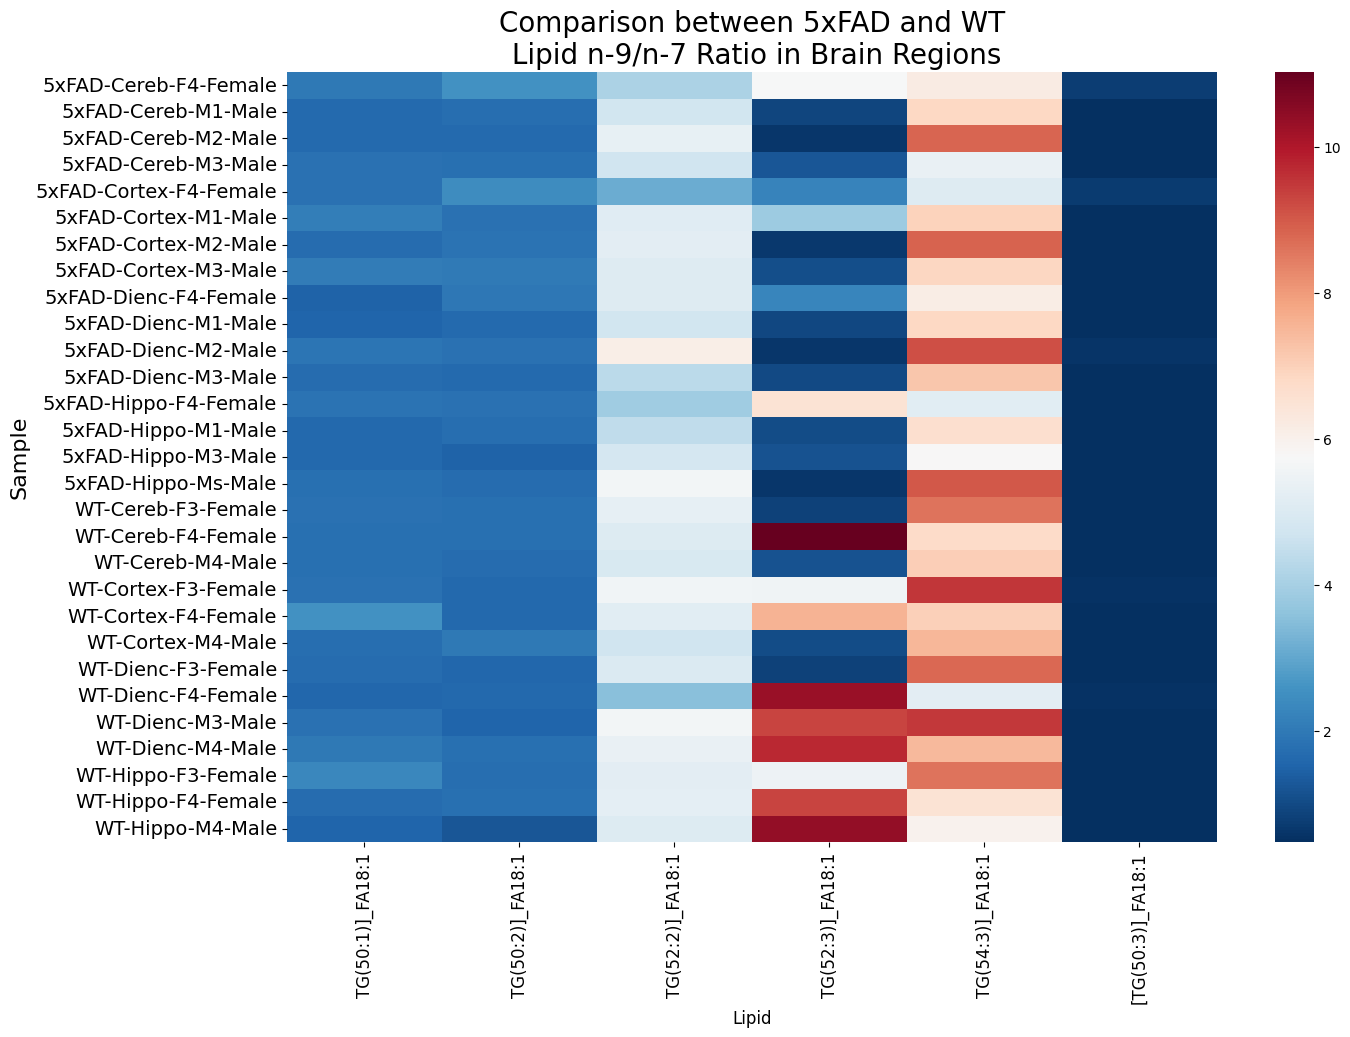

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_OzESI_5_ratio_final is already defined

def label_brain_region(sample_id):
    brain_regions = ['Cereb', 'Cortex', 'Dienc', 'Hippo']
    for region in brain_regions:
        if region.lower() in sample_id.lower():
            return region
    return ""

def label_sex(sample_id):
    sexes = ['F1', 'F2', 'F3', 'F4', 'M1', 'M2', 'M3', 'M4','Ms']
    for sex in sexes:
        if sex in sample_id:
            return sex
    return ""

def determine_gender(sex_label):
    if sex_label.startswith('F'):
        return 'Female'
    elif sex_label.startswith('M'):
        return 'Male'
    return ""


def determine_genotype(sample_id):
    if '5xfad' in sample_id.lower():
        return '5xFAD'
    elif 'wt' in sample_id.lower():
        return 'WT'
    return ""
####
# Copy df_OzESI_5_ratio_final to df_heatmap
df_heatmap = df_OzESI_5_ratio_final.copy()

df_heatmap['Sample_ID'] = df_heatmap['Sample_ID'].str.replace('-', '_')
####


#drop values in column Ratio that are NaN
df_heatmap = df_heatmap.dropna(subset=['Ratio'])
#drop sample_id string = blank
df_heatmap = df_heatmap[df_heatmap['Sample_ID'] != 'blank']
#drop lipid 54:4 52:4 and 54:5 within the string
df_heatmap = df_heatmap[~df_heatmap['Lipid'].str.contains('54:4|52:4|54:5')]

#split 5xFAD vs WT
df_heatmap['Group'] = df_heatmap['Sample_ID'].apply(determine_group)

df_heatmap['Brain_Region'] = df_heatmap['Sample_ID'].apply(label_brain_region)
df_heatmap['Sex_Label'] = df_heatmap['Sample_ID'].apply(label_sex)
df_heatmap['Gender'] = df_heatmap['Sex_Label'].apply(determine_gender)
df_heatmap['Genotype'] = df_heatmap['Sample_ID'].apply(determine_genotype)
df_heatmap.head(None)



# Group by Brain_Region, Sex_Label, Gender, and Lipid. Then, aggregate the Ratio values (e.g., mean value).
grouped_data = df_heatmap.groupby(['Genotype','Brain_Region', 'Sex_Label', 'Gender', 'Lipid']).agg({'Ratio': 'mean'}).reset_index()

# Pivot the table to prepare it for the heatmap.
heatmap_data = grouped_data.pivot_table(index=['Genotype','Brain_Region', 'Sex_Label', 'Gender'], columns='Lipid', values='Ratio')


# Determine the location for the dividing line between 5xFAD and WT
dividing_line_position = len(heatmap_data.loc['5xFAD'])


# Display the heatmap.
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='RdBu_r', annot=False, fmt=".2f")
plt.title('Comparison between 5xFAD and WT\n Lipid n-9/n-7 Ratio in Brain Regions', fontsize=20)
# Adjust the x and y axis label size
plt.xlabel('Lipid', fontsize=12)
plt.ylabel('Sample', fontsize=16)

# Adjust the x and y axis tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)



# # Calculate dividing lines for 5xFAD
# dividing_lines_5xFAD = [
#     len(heatmap_data.loc[('5xFAD', 'Cereb')]),
#     len(heatmap_data.loc[('5xFAD', 'Cereb')]) + len(heatmap_data.loc[('5xFAD', 'Cortex')]),
#     len(heatmap_data.loc[('5xFAD', 'Cereb')]) + len(heatmap_data.loc[('5xFAD', 'Cortex')]) + len(heatmap_data.loc[('5xFAD', 'Dienc')])
# ]

# # Calculate starting point for WT
# start_WT = 16

# # Calculate dividing lines for WT
# dividing_lines_WT = [
#     start_WT + len(heatmap_data.loc[('WT', 'Cereb')]),
#     start_WT + len(heatmap_data.loc[('WT', 'Cereb')]) + len(heatmap_data.loc[('WT', 'Cortex')]),
#     start_WT + len(heatmap_data.loc[('WT', 'Cereb')]) + len(heatmap_data.loc[('WT', 'Cortex')]) + len(heatmap_data.loc[('WT', 'Dienc')])
# ]

# # Draw dividing lines for both 5xFAD and WT
# for line in dividing_lines_5xFAD + dividing_lines_WT:
#     plt.axhline(y=line, color='red', linestyle='--')


# Rotate the x-axis labels
plt.xticks(rotation=90)


# # Add a dividing line between 5xFAD and WT
# plt.axhline(y=dividing_line_position, color='black', linestyle='-')

# #save as png
# plt.savefig('Projects/04_29_23/Plots/Ratio/CaitlinPaper_brainRegion_n9n7Ratios_withoutLine.png', dpi=300, bbox_inches='tight')

plt.show()


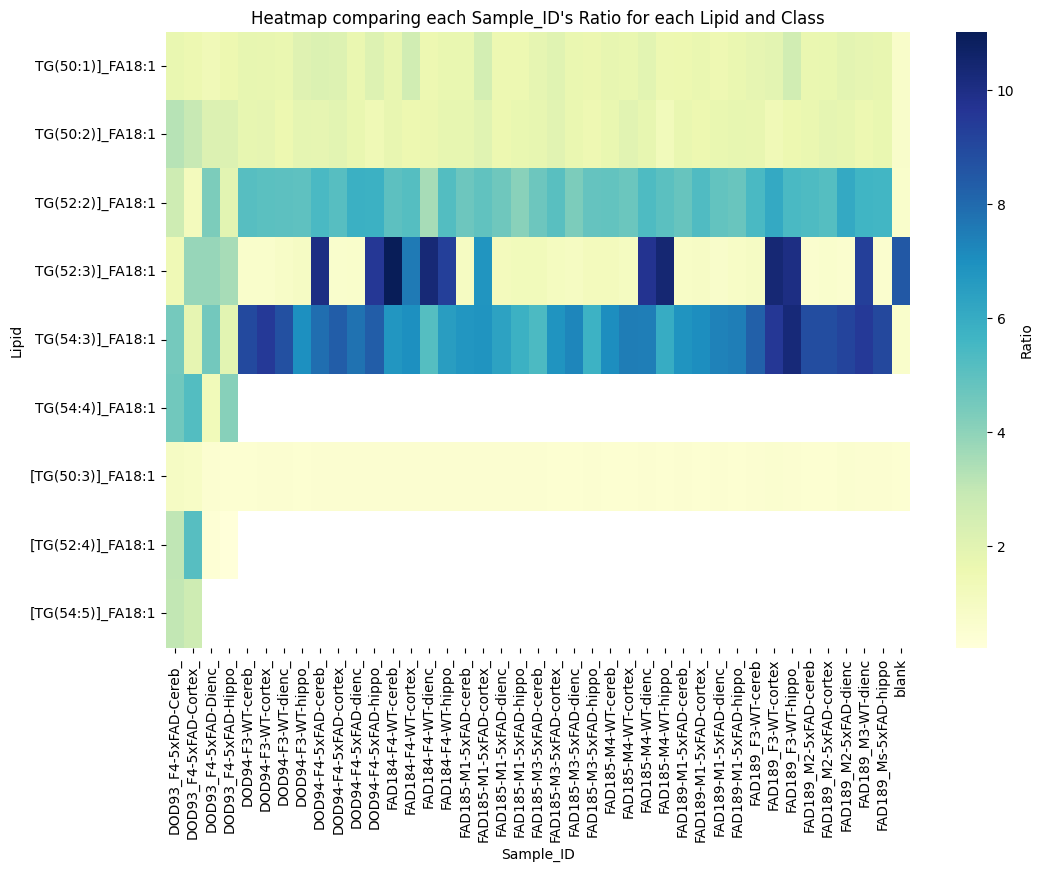

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_OzESI_5_ratio_final is already defined

# Filling NaN values in 'Class' column with a placeholder for visualization purposes
#drop 54:4 52:4 and 54:5 from the df call the new df df_heatmap


# Pivot the dataframe
pivot_df = df_OzESI_5_ratio_final.pivot_table(index=['Lipid'], columns='Sample_ID', values='Ratio')

# Plotting without annotations
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Ratio'})
plt.title('Heatmap comparing each Sample_ID\'s Ratio for each Lipid and Class')
plt.show()


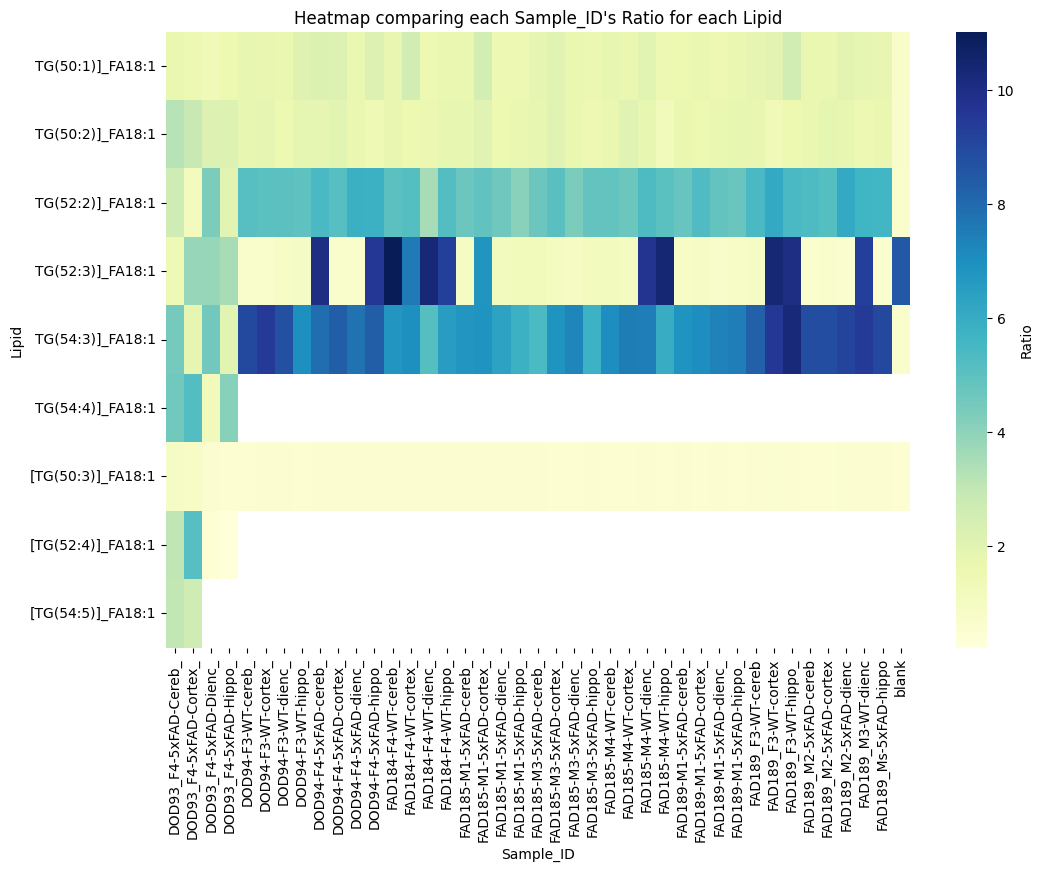

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_OzESI_5_ratio_final is already defined

# Copy df_OzESI_5_ratio_final to df_heatmap
df_heatmap = df_OzESI_5_ratio_final.copy()

# Drop '_TG18-1_o3on' from the Sample_ID in df_heatmap
df_heatmap['Sample_ID'] = df_heatmap['Sample_ID'].str.replace('_TG18-1_o3on', '')

# Pivot the dataframe
pivot_df = df_heatmap.pivot_table(index=['Lipid'], columns='Sample_ID', values='Ratio')

# Plotting without annotations
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Ratio'})
plt.title('Heatmap comparing each Sample_ID\'s Ratio for each Lipid')
plt.show()


/tmp/ipykernel_2985/4105498573.py:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2985/4105498573.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



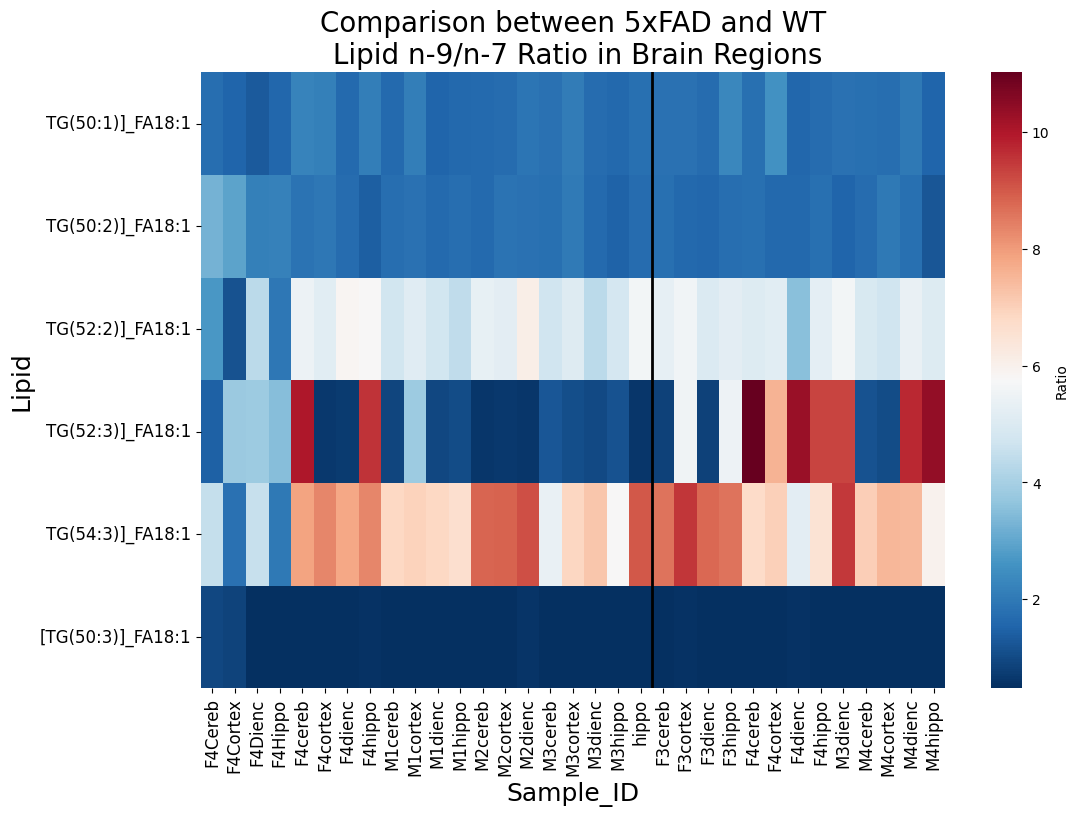

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_OzESI_5_ratio_final is already defined

def label_brain_region(sample_id):
    brain_regions = ['Cereb', 'Cortex', 'Dienc', 'Hippo']
    for region in brain_regions:
        if region.lower() in sample_id.lower():
            return region
    return ""

def label_sex(sample_id):
    sexes = ['F1', 'F2', 'F3', 'F4', 'M1', 'M2', 'M3', 'M4']
    for sex in sexes:
        if sex in sample_id:
            return sex
    return ""


# Copy df_OzESI_5_ratio_final to df_heatmap
df_heatmap = df_OzESI_5_ratio_final.copy()


df_heatmap['Brain_Region'] = df_heatmap['Sample_ID'].apply(label_brain_region)
df_heatmap['Sex'] = df_heatmap['Sample_ID'].apply(label_sex)
# Define the pattern for the regex
pattern_combined = r'(?i)(Cereb|Cortex|Dienc|Hippo|F[1-4]|M[1-4])'


df_heatmap['Sample_ID'] = df_heatmap['Sample_ID'].str.replace('-', '_')
# Remove trailing underscores from 'Sample_ID' and drop '_TG18-1_o3on'
df_heatmap['Sample_ID'] = df_heatmap['Sample_ID'].str.rstrip('_').str.replace('_TG18-1_o3on', '')

# Drop rows where Lipid contains specific values
lipids_to_drop = ['54:4', '52:4', '54:5']
pattern = '|'.join(lipids_to_drop)
df_heatmap = df_heatmap[~df_heatmap['Lipid'].str.contains(pattern, na=False)]

# Drop rows where Sample_ID is blank or NaN
df_heatmap = df_heatmap[df_heatmap['Sample_ID'].notna() & df_heatmap['Sample_ID'].ne('blank')]

# Split the dataframe into 5xFAD and WT groups
df_5xFAD = df_heatmap[df_heatmap['Sample_ID'].str.contains('5xFAD', case=False)]
df_WT = df_heatmap[df_heatmap['Sample_ID'].str.contains('WT', case=False)]

# Function to process the Sample_ID and keep only the desired parts
def process_sample_id(sample_id):
    # Replace "-" with "_"
    sample_id = sample_id.replace('-', '_')
    matches = re.findall(pattern_combined, sample_id)
    return ''.join(matches)

df_5xFAD['Sample_ID'] = df_5xFAD['Sample_ID'].apply(process_sample_id)
df_WT['Sample_ID'] = df_WT['Sample_ID'].apply(process_sample_id)

# Define a pattern to extract brain regions and the F4, F3, M1, M3, M4 parts. Making it case insensitive with `(?i)`
pattern_combined = r'(?i)(Cereb|Cortex|Dienc|Hippo|F4|F3|F2|F1|M1|M2|M3|M4|DOD93|DOD94|FAD185|FAD189)'



# # Extract desired parts and concatenate them. Ensure NaNs are replaced with empty strings.
# df_5xFAD['Sample_ID'] = df_5xFAD['Sample_ID'].str.extractall(pattern_combined).fillna('').unstack().apply(lambda x: ''.join(str(v) for v in x), axis=1)
# df_WT['Sample_ID'] = df_WT['Sample_ID'].str.extractall(pattern_combined).fillna('').unstack().apply(lambda x: ''.join(str(v) for v in x), axis=1)

# Pivot the dataframes
pivot_5xFAD = df_5xFAD.pivot_table(index=['Lipid'], columns='Sample_ID', values='Ratio')
pivot_WT = df_WT.pivot_table(index=['Lipid'], columns='Sample_ID', values='Ratio')

# Concatenate the pivoted dataframes horizontally
combined_pivot = pd.concat([pivot_5xFAD, pivot_WT], axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(combined_pivot, cmap='RdBu_r', annot=False, cbar_kws={'label': 'Ratio'}, ax=ax)
ax.axvline(len(pivot_5xFAD.columns), color='black', linewidth=2)  # Add a demarcation line
plt.title('Comparison between 5xFAD and WT\n Lipid n-9/n-7 Ratio in Brain Regions', fontsize=20)

# Adjust the x and y axis label size
ax.set_xlabel('Sample_ID', fontsize=18)
ax.set_ylabel('Lipid', fontsize=18)

# Adjust the x and y axis tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# fig.savefig("Projects/04_29_23/Plots/Ratio/Brain_ratios_042923_2", dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_2985/2855623848.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2985/2855623848.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



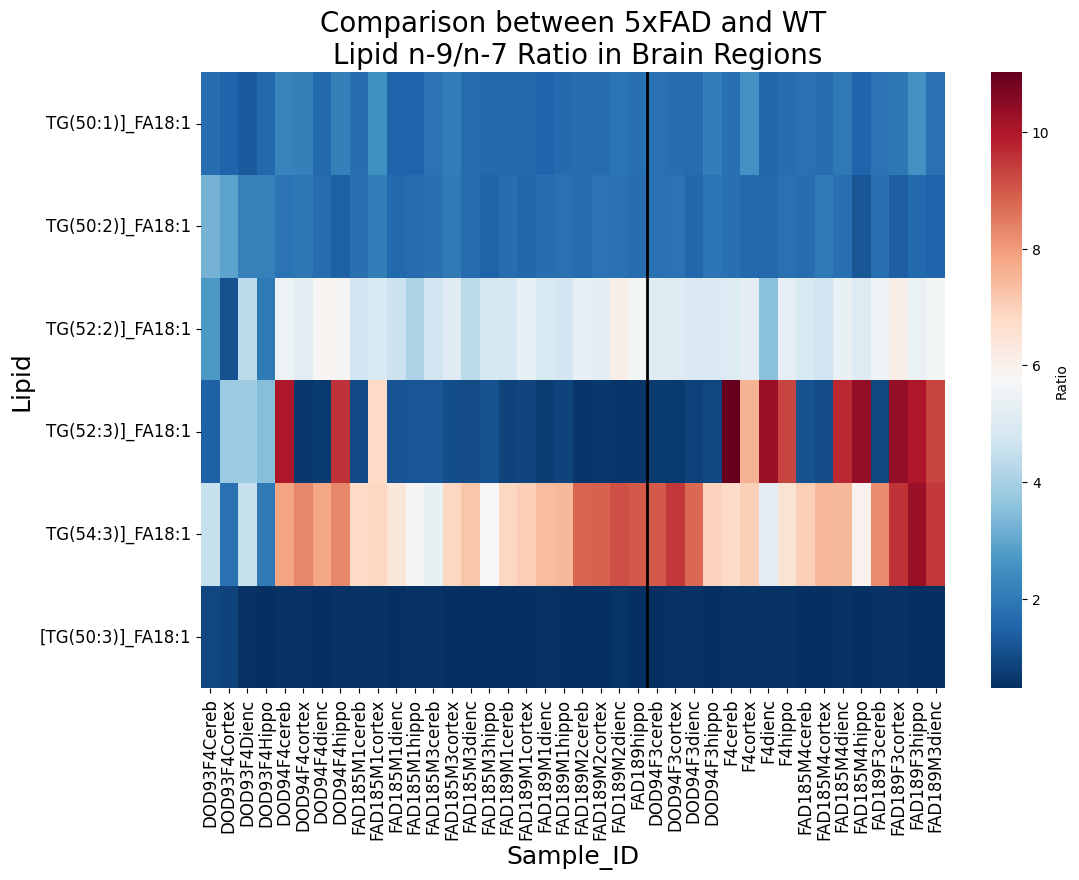

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_OzESI_5_ratio_final is already defined

# Copy df_OzESI_5_ratio_final to df_heatmap
df_heatmap = df_OzESI_5_ratio_final.copy()
df_heatmap['Sample_ID'] = df_heatmap['Sample_ID'].str.replace('-', '_')
# Remove trailing underscores from 'Sample_ID' and drop '_TG18-1_o3on'
df_heatmap['Sample_ID'] = df_heatmap['Sample_ID'].str.rstrip('_').str.replace('_TG18-1_o3on', '')

# Drop rows where Lipid contains specific values
lipids_to_drop = ['54:4', '52:4', '54:5']
pattern = '|'.join(lipids_to_drop)
df_heatmap = df_heatmap[~df_heatmap['Lipid'].str.contains(pattern, na=False)]

# Drop rows where Sample_ID is blank or NaN
df_heatmap = df_heatmap[df_heatmap['Sample_ID'].notna() & df_heatmap['Sample_ID'].ne('blank')]

# Split the dataframe into 5xFAD and WT groups
df_5xFAD = df_heatmap[df_heatmap['Sample_ID'].str.contains('5xFAD', case=False)]
df_WT = df_heatmap[df_heatmap['Sample_ID'].str.contains('WT', case=False)]

# Function to process the Sample_ID and keep only the desired parts
def process_sample_id(sample_id):
    # Replace "-" with "_"
    sample_id = sample_id.replace('-', '_')
    matches = re.findall(pattern_combined, sample_id)
    return ''.join(matches)

df_5xFAD['Sample_ID'] = df_5xFAD['Sample_ID'].apply(process_sample_id)
df_WT['Sample_ID'] = df_WT['Sample_ID'].apply(process_sample_id)

# Define a pattern to extract brain regions and the F4, F3, M1, M3, M4 parts. Making it case insensitive with `(?i)`
pattern_combined = r'(?i)(Cereb|Cortex|Dienc|Hippo|F4|F3|F2|F1|M1|M2|M3|M4|DOD93|DOD94|FAD185|FAD189)'



# # Extract desired parts and concatenate them. Ensure NaNs are replaced with empty strings.
# df_5xFAD['Sample_ID'] = df_5xFAD['Sample_ID'].str.extractall(pattern_combined).fillna('').unstack().apply(lambda x: ''.join(str(v) for v in x), axis=1)
# df_WT['Sample_ID'] = df_WT['Sample_ID'].str.extractall(pattern_combined).fillna('').unstack().apply(lambda x: ''.join(str(v) for v in x), axis=1)

# Pivot the dataframes
pivot_5xFAD = df_5xFAD.pivot_table(index=['Lipid'], columns='Sample_ID', values='Ratio')
pivot_WT = df_WT.pivot_table(index=['Lipid'], columns='Sample_ID', values='Ratio')

# Concatenate the pivoted dataframes horizontally
combined_pivot = pd.concat([pivot_5xFAD, pivot_WT], axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(combined_pivot, cmap='RdBu_r', annot=False, cbar_kws={'label': 'Ratio'}, ax=ax)
ax.axvline(len(pivot_5xFAD.columns), color='black', linewidth=2)  # Add a demarcation line
plt.title('Comparison between 5xFAD and WT\n Lipid n-9/n-7 Ratio in Brain Regions', fontsize=20)

# Adjust the x and y axis label size
ax.set_xlabel('Sample_ID', fontsize=18)
ax.set_ylabel('Lipid', fontsize=18)

# Adjust the x and y axis tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# fig.savefig("Projects/04_29_23/Plots/Ratio/Brain_ratios_042923_2", dpi=300, bbox_inches='tight')
plt.show()


# Caitlin Validation CLAW vs Manual

In [18]:
# import pandas as pd

# # First dataframe
# data1 = {
#     'TG': ['TG(52:2)', 'TG(52:3)', 'TG(52:4)', 'TG(54:2)', 'TG(54:3)', 'TG(54:4)', 'TG(54:5)'],
#     'Crude': [4.23, 3.16, 3.05, 3.94, 5.81, 4.91, 4.09],
#     'Degummed': [4.31, 2.50, 2.96, 4.25, 5.75, 4.07, 3.83],
#     'RBD': [4.70, 3.07, 2.68, 3.17, 5.41, 4.97, 3.83]
# }
# df1 = pd.DataFrame(data1)

# # Second dataframe
# data2 = {
#     'TG': ['TG 52:2', 'TG 52:3', 'TG 52:4', 'TG 54:2', 'TG 54:3', 'TG 54:4', 'TG 54:5'],
#     'Crude': [4.4, 3.2, 3.1, 4.5, 5.7, 4.8, 4.1],
#     'Degummed': [4.3, 2.6, 3.1, 4.2, 5.7, 4.0, 3.4],
#     'RBD': [4.3, 2.6, 3.1, 4.2, 5.7, 4.0, 3.4]
# }
# df2 = pd.DataFrame(data2)

# print(df1)
# print(df2)


In [19]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # First dataframe with renamed columns
# CLAW_canola = {
#     'TG': ['TG(52:2)', 'TG(52:3)', 'TG(52:4)', 'TG(54:2)', 'TG(54:3)', 'TG(54:4)'],
#     'Crude': [4.23, 3.16, 3.05, 3.94, 5.81, 4.91],
#     'Degummed': [4.31, 2.50, 2.96, 4.25, 5.75, 4.07],
#     'RBD': [4.70, 3.07, 2.68, 3.17, 5.41, 4.97]
# }
# CLAW_df = pd.DataFrame(CLAW_canola)

# # Second dataframe with renamed columns
# caitlin_canola = {
#     'TG': ['TG(52:2)', 'TG(52:3)', 'TG(52:4)', 'TG(54:2)', 'TG(54:3)', 'TG(54:4)'],
#     'Crude': [4.4, 3.2, 3.1, 4.5, 5.7, 4.8],
#     'Degummed': [4.3, 2.6, 3.1, 4.2, 5.7, 4.0],
#     'RBD': [4.3, 2.6, 3.1, 4.2, 5.7, 4.0]
# }
# Caitlin_df = pd.DataFrame(caitlin_canola)

# # Scatter plots
# for column in ['Crude', 'Degummed', 'RBD']:
#     plt.figure(figsize=(10, 6))
#     plt.plot(CLAW_df['TG'], CLAW_df[column], label=f'CLAW', marker='o')
#     plt.plot(Caitlin_df['TG'], Caitlin_df[column], label=f'Manual', marker='x')
#     plt.title(f'CLAW vs Manual Processing: {column} Canola Oil')
#     plt.xlabel('TG')
#     plt.ylabel(column)
#     plt.legend()
#     plt.grid(True)
#     plt.xticks(rotation=45)
#     plt.savefig(f'CLAW_vs_Manual_{column}_Canola_Oil.png', dpi=300, bbox_inches='tight')
    
#     plt.show()


In [20]:
# columns_of_interest = ['Crude', 'Degummed', 'RBD']

# for tg_value in CLAW_df['TG']:
#     print(f"\nDifference for TG: {tg_value}")
#     for col in columns_of_interest:
#         difference = CLAW_df[CLAW_df['TG'] == tg_value][col].iloc[0] - Caitlin_df[Caitlin_df['TG'] == tg_value][col].iloc[0]
#         print(f"{col} difference: {difference:.2f}")

# # Standard deviation for each sample
# std_dev_CLAW = CLAW_df[columns_of_interest].std()
# std_dev_Caitlin = Caitlin_df[columns_of_interest].std()

# print("\nStandard Deviation for CLAW samples:")
# print(std_dev_CLAW)

# print("\nStandard Deviation for Caitlin samples:")
# print(std_dev_Caitlin)


In [21]:

# import numpy as np

# std_devs = []

# for tg_value in CLAW_df['TG']:
#     claw_crude_value = CLAW_df[CLAW_df['TG'] == tg_value]['Crude'].iloc[0]
#     caitlin_crude_value = Caitlin_df[Caitlin_df['TG'] == tg_value]['Crude'].iloc[0]
    
#     std_dev = np.std([claw_crude_value, caitlin_crude_value], ddof=1) # ddof=1 gives the sample std deviation
#     std_devs.append(std_dev)

#     print(f"Standard Deviation for TG {tg_value} in Crude sample: {std_dev:.2f}")

# # Mean of the standard deviations
# mean_std_dev = np.mean(std_devs)

# print(f"\nMean of the standard deviations for all TGs in Crude sample: {mean_std_dev:.2f}")


In [22]:
# import numpy as np

# samples = ['Crude', 'Degummed', 'RBD']

# for sample in samples:
#     std_devs = []

#     for tg_value in CLAW_df['TG']:
#         claw_value = CLAW_df[CLAW_df['TG'] == tg_value][sample].iloc[0]
#         caitlin_value = Caitlin_df[Caitlin_df['TG'] == tg_value][sample].iloc[0]
        
#         std_dev = np.std([claw_value, caitlin_value], ddof=1)  # ddof=1 gives the sample std deviation
#         std_devs.append(std_dev)

#         print(f"Standard Deviation for TG {tg_value} in {sample} sample: {std_dev:.2f}")

#     # Mean of the standard deviations for each sample type
#     mean_std_dev = np.mean(std_devs)

#     print(f"\nMean of the standard deviations for all TGs in {sample} sample: {mean_std_dev:.2f}\n")


In [23]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # First dataframe with renamed columns
# CLAW_canola = {
#     'TG': ['TG(52:2)_FA 18:1', 'TG(52:3)_FA 18:1', 'TG(52:4)_FA 18:1', 'TG(54:2)_FA 18:1', 'TG(54:3)_FA 18:1', 'TG(54:4)_FA 18:1','TG(54:5)_FA 18:1'],
#     'Crude': [4.23, 3.16, 3.05, 3.94, 5.81, 4.91,4.09],
#     'Degummed': [4.31, 2.50, 2.96, 4.25, 5.75, 4.07,3.83],
#     'RBD': [4.70, 3.07, 2.68, 3.17, 5.41, 4.97,3.83]
# }
# CLAW_df = pd.DataFrame(CLAW_canola)

# import plotly.graph_objects as go

# # Create a grouped horizontal bar chart with gradient colors
# fig = go.Figure(data=[
#     go.Bar(name='RBD', y=CLAW_df['TG'], x=CLAW_df['RBD'], orientation='h', 
#            marker=dict(color='orange', line=dict(color='darkorange', width=1), colorscale='Oranges')),
#     go.Bar(name='Degummed', y=CLAW_df['TG'], x=CLAW_df['Degummed'], orientation='h', 
#            marker=dict(color='green', line=dict(color='darkgreen', width=1), colorscale='Greens')),
#     go.Bar(name='Crude', y=CLAW_df['TG'], x=CLAW_df['Crude'], orientation='h', 
#            marker=dict(color='blue', line=dict(color='darkblue', width=1), colorscale='Blues'))
# ])

# # Change the bar mode to 'group'
# fig.update_layout(barmode='group', 
#                   title='<b>'+"Canola Oil TG Comparison Across Processing Steps" +'<b>',
#                   title_x=0.5,
#                   yaxis_title='<i>'+"Lipid Structure"+'<i>',
#                   xaxis_title='<i>'+"n-9/n-7 FA 18:1 Isomer Ratio"+'<i>',
#                   title_font_size=32,  # Increase the main title font size
#                   yaxis_title_font=dict(size=24),  # Increase y-axis title font size
#                   xaxis_title_font=dict(size=24),   # Increase x-axis title font size
#                   width=1000,
#                   height=600,
#                   legend_title_font=dict(size=24),
#                   legend_font=dict(size=20)
# )
# fig.update_yaxes(tickfont=dict(family="Arial Black", size=20))  
# fig.update_xaxes(tickfont=dict(family="Arial Black", size=20))  
# # Show the figure
# fig.show()



In [24]:
# import pymzml
# import pandas as pd
# import matplotlib.pyplot as plt

# file_path = 'Projects/canola/mzml/CrudeCanola_O3on_150gN3_02082023.mzML'
# run = pymzml.run.Reader(file_path, skip_chromatogram=False)

# time_points = []
# total_ion_counts = []



# for spectrum in run:
#     if isinstance(spectrum, pymzml.spec.Chromatogram):
#         for time, intensity in spectrum.peaks():
#             print(time, intensity)